# <font color='blue'>TalkingData AdTracking Fraud Detection</font>

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Python Version:', python_version())

# Verificando as versões dos pacotes instalados
pandasVersion = !pip show pandas
matplotlibVersion = !pip show matplotlib
sklearnVersion = !pip show scikit-learn
print('Pandas', pandasVersion[1])
print("Matplotlib", matplotlibVersion[1])
print("Sklearn", sklearnVersion[1])

Python Version: 3.9.13
Pandas Version: 2.0.2
Matplotlib Version: 3.7.1
Sklearn Version: 1.2.2


## 1 - Definição do Problema de Negócio
<details>
    <summary>
        <a class="btnfire small stroke"><em class="fas fa-chevron-circle-down"></em>&nbsp;&nbsp;Clique para mais detalhes</a>
    </summary>
    <br>
Os modelos desenvolvidos nesta competição, devem ser capazes de detectar tráfego de cliques fraudulentos, para anúncios de aplicativos para celular. <br>
O risco de fraude está em toda parte, mas para as empresas que anunciam online, a fraude de cliques pode ocorrer em um volume avassalador, resultando em dados de cliques falsos e dinheiro desperdiçado. Os canais de anúncios podem aumentar os custos simplesmente clicando no anúncio em grande escala. Com mais de 1 bilhão de dispositivos móveis inteligentes em uso ativo todos os meses, a China é o maior mercado móvel do mundo e, portanto, sofre com grandes volumes de tráfego fraudulento. <br>
A TalkingData, a maior plataforma independente de serviços de Big Data da China, cobre mais de 70% dos dispositivos móveis ativos em todo o país. A empresa lida com 3 bilhões de cliques por dia, dos quais 90% são potencialmente fraudulentos. Sua estratégia atual para evitar fraudes de cliques para desenvolvedores de aplicativos é medir a jornada do clique de um usuário em seu portfólio e sinalizar endereços IP que produzem muitos cliques, mas nunca acabam instalando aplicativos. Com essas informações, a empresa criou uma lista negra de IP e uma lista negra de dispositivos. <br>
Apesar dessa estratégia ser bem sucedida, a empresa deseja estar sempre um passo à frente dos fraudadores e recorreram à comunidade Kaggle para obter ajuda no desenvolvimento de uma solução. O objetivo deste projeto é criar um algoritmo que prevê se um usuário fará o download de um aplicativo depois de clicar em um anúncio de aplicativo para celular.<br>
O conjunto de dados possui aproximadamente 200 milhões de cliques coletados em 4 dias. <br> <br>


Endereço do conjunto de dados: https://www.kaggle.com/competitions/talkingdata-adtracking-fraud-detection/overview <br>


</details>

## 2 - Coletando os dados

#### 2.1 - Importando as bibliotecas

In [2]:
# Manipulação e exploração do conjunto de dados
import pandas as pd
import numpy as np
import csv

# Calcular o tempo de execução de uma célula
from datetime import datetime

# Cálculos matemáticos
import math
import random

# Plotagem de gráficos
import seaborn as sns
import matplotlib.pyplot as plt

# Imputação de valores nulos
from sklearn.impute import SimpleImputer

# Converter variáveis categóricas em números

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Balanceamento de classes
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler 

# Seleção de variáveis
from sklearn.feature_selection import RFE, SelectKBest

# Pré-processamento dos dados
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Dividir dados de treino e teste
from sklearn.model_selection import train_test_split

# Buscar os melhores parâmetros que serão utilizados nos modelos preditivos
from sklearn.model_selection import RandomizedSearchCV

# Algoritmos de classificação
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

# Métricas de avaliação dos modelos preditivos
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, roc_auc_score

# Carregar e salvar objetos Python em arquivos no disco
import pickle

# Esse módulo ignara os avisos
import warnings
warnings.filterwarnings("ignore")

#### 2.2 - Carregando os dados

##### 2.2.1 - Selecionando linhas que ocorreram o download

In [3]:
# Marca o início da execução 
inicio = datetime.now()

# Cria uma lista vazia
listaDeLinhas = [] 

# Ler o arquivo no disco
with open ('Dados/TalkingData/train.csv', 'r') as arquivo:
    csvreader = csv.reader(arquivo)
    
    # Loop que percorre todas as linhas do arquivo
    for linha in csvreader:
        
        # Verifica se houve download
        if linha[7] == '1':
            # Adiciona a linha na lista de linhas
            listaDeLinhas.append(linha)

# Imprime na tela o tempo total
print('Tempo Total :', datetime.now() - inicio)

Tempo Total : 0:02:51.157005


In [4]:
# Verificando o tamanho da lista 
len(listaDeLinhas)

456846

In [5]:
# Cria um DataFrame
dfAtribuido = pd.DataFrame(listaDeLinhas, columns=["ip", "app", "dispositivo", "so", "canal", "horario_clique", "horario_atribuido", "atribuido"])
dfAtribuido

,ip,app,dispositivo,so,canal,horario_clique,horario_atribuido,atribuido
0,204158,35,1,13,21,2017-11-06 15:41:07,2017-11-07 08:17:19,1
1,29692,9,1,22,215,2017-11-06 16:00:02,2017-11-07 10:05:22,1
2,64516,35,1,13,21,2017-11-06 16:00:02,2017-11-06 23:40:50,1
3,172429,35,1,46,274,2017-11-06 16:00:03,2017-11-07 00:55:29,1
4,199085,35,1,13,274,2017-11-06 16:00:04,2017-11-06 23:04:54,1
...,...,...,...,...,...,...,...,...
456841,313982,10,1,27,113,2017-11-09 15:59:21,2017-11-09 15:59:53,1
456842,331467,5,1,47,113,2017-11-09 15:59:21,2017-11-09 15:59:26,1
456843,29789,45,1,32,419,2017-11-09 15:59:26,2017-11-09 15:59:42,1
456844,308776,10,1,11,113,2017-11-09 15:59:26,2017-11-09 15:59:58,1


In [6]:
# Cria uma amostra do DataFrame
dfAtribuido = dfAtribuido.sample(n=50000, random_state=10)
dfAtribuido

,ip,app,dispositivo,so,canal,horario_clique,horario_atribuido,atribuido
43484,212020,5,1,61,113,2017-11-07 02:39:59,2017-11-07 02:40:32,1
99827,25614,19,0,38,213,2017-11-07 09:16:10,2017-11-07 10:29:09,1
347146,73015,11,1,19,319,2017-11-09 03:01:58,2017-11-09 04:31:03,1
158976,286256,5,1,26,113,2017-11-07 18:32:21,2017-11-07 18:32:51,1
421631,120597,19,0,50,213,2017-11-09 11:23:38,2017-11-09 14:28:41,1
...,...,...,...,...,...,...,...,...
222682,54722,29,1,13,343,2017-11-08 05:40:52,2017-11-08 07:57:51,1
50018,2433,35,1,20,21,2017-11-07 03:15:45,2017-11-07 06:30:04,1
224859,53916,35,1,13,274,2017-11-08 05:53:51,2017-11-08 06:28:03,1
67816,201413,10,1,61,113,2017-11-07 05:19:17,2017-11-07 05:19:47,1


##### 2.2.2 - Selecionando linhas que NÃO ocorreram o download

In [7]:
# Marca o início da execução 
inicio = datetime.now()

# Cria uma lista vazia
listaDeLinhas = [] 

# Ler o arquivo no disco
with open ('Dados/TalkingData/train_sample.csv', 'r') as arquivo:
    csvreader = csv.reader(arquivo)
    
    # Loop que percorre todas as linhas do arquivo
    for linha in csvreader:
        
        # Verifica se NÃO houve download
        if linha[7] == '0':
            # Adiciona a linha na lista de linhas
            listaDeLinhas.append(linha)

# Imprime na tela o tempo total
print('Tempo Total :', datetime.now() - inicio)

Tempo Total : 0:00:02.067520


In [8]:
# Verificando o tamanho da lista 
len(listaDeLinhas)

99773

In [9]:
# Cria um DataFrame
dfNaoAtribuido = pd.DataFrame(listaDeLinhas, columns=["ip", "app", "dispositivo", "so", "canal", "horario_clique", "horario_atribuido", "atribuido"])
dfNaoAtribuido

,ip,app,dispositivo,so,canal,horario_clique,horario_atribuido,atribuido
0,87540,12,1,13,497,2017-11-07 09:30:38,,0
1,105560,25,1,17,259,2017-11-07 13:40:27,,0
2,101424,12,1,19,212,2017-11-07 18:05:24,,0
3,94584,13,1,13,477,2017-11-07 04:58:08,,0
4,68413,12,1,1,178,2017-11-09 09:00:09,,0
...,...,...,...,...,...,...,...,...
99768,124883,11,1,19,122,2017-11-09 13:25:41,,0
99769,85150,9,1,13,244,2017-11-07 11:25:43,,0
99770,18839,3,1,13,19,2017-11-08 11:38:42,,0
99771,114276,15,1,12,245,2017-11-08 17:55:21,,0


In [10]:
# Cria uma amostra do DataFrame
dfNaoAtribuido = dfNaoAtribuido.sample(n=50000, random_state=10)
dfNaoAtribuido

,ip,app,dispositivo,so,canal,horario_clique,horario_atribuido,atribuido
9791,14737,21,2,10,128,2017-11-08 14:49:15,,0
16460,114617,2,1,22,243,2017-11-09 10:35:37,,0
7692,47422,12,1,13,328,2017-11-07 09:10:36,,0
19104,105748,12,1,31,245,2017-11-08 17:15:19,,0
79460,168102,12,1,36,205,2017-11-07 11:13:48,,0
...,...,...,...,...,...,...,...,...
87067,47337,9,2,13,466,2017-11-09 12:30:35,,0
76577,134416,9,1,19,334,2017-11-07 02:49:34,,0
96991,76919,2,1,20,237,2017-11-08 13:29:14,,0
67790,87778,8,1,26,145,2017-11-09 03:41:03,,0


##### 2.2.3 - Juntando os DataFrames

In [11]:
# Junta os DataFrames
df = pd.concat([dfAtribuido, dfNaoAtribuido], axis = "index", ignore_index = True)
df

,ip,app,dispositivo,so,canal,horario_clique,horario_atribuido,atribuido
0,212020,5,1,61,113,2017-11-07 02:39:59,2017-11-07 02:40:32,1
1,25614,19,0,38,213,2017-11-07 09:16:10,2017-11-07 10:29:09,1
2,73015,11,1,19,319,2017-11-09 03:01:58,2017-11-09 04:31:03,1
3,286256,5,1,26,113,2017-11-07 18:32:21,2017-11-07 18:32:51,1
4,120597,19,0,50,213,2017-11-09 11:23:38,2017-11-09 14:28:41,1
...,...,...,...,...,...,...,...,...
99995,47337,9,2,13,466,2017-11-09 12:30:35,,0
99996,134416,9,1,19,334,2017-11-07 02:49:34,,0
99997,76919,2,1,20,237,2017-11-08 13:29:14,,0
99998,87778,8,1,26,145,2017-11-09 03:41:03,,0


##### 2.2.4 - Excluindo os DataFrames que não serão utilizados

In [12]:
# Excluir os DataFrames para liberar espaço na memória
del([dfAtribuido, dfNaoAtribuido])

In [13]:
# Separando a variável alvo
variavelAlvo = "atribuido"

## 3 - Reservar linhas para validar o modelo

In [14]:
# Criando uma amostra do conjuto de dados
# O parâmetro "n" define a quantidade de linhas da amostra
dfValidacao = df.sample(n=2, random_state=5)
dfValidacao

,ip,app,dispositivo,so,canal,horario_clique,horario_atribuido,atribuido
60743,120440,3,1,13,19,2017-11-07 00:31:49,,0
33949,294584,7,1,19,101,2017-11-09 07:17:57,2017-11-09 09:33:17,1


In [15]:
# Excluindo do DataFrame original as linhas que serão utilizadas para validar o modelo 
for k in dfValidacao.index:
    df.drop([k], inplace = True)

# É importante reiniciar os índices após a exclusão de linhas
df.reset_index(inplace = True)
df.head()

,index,ip,app,dispositivo,so,canal,horario_clique,horario_atribuido,atribuido
0,0,212020,5,1,61,113,2017-11-07 02:39:59,2017-11-07 02:40:32,1
1,1,25614,19,0,38,213,2017-11-07 09:16:10,2017-11-07 10:29:09,1
2,2,73015,11,1,19,319,2017-11-09 03:01:58,2017-11-09 04:31:03,1
3,3,286256,5,1,26,113,2017-11-07 18:32:21,2017-11-07 18:32:51,1
4,4,120597,19,0,50,213,2017-11-09 11:23:38,2017-11-09 14:28:41,1


In [16]:
# Excluindo coluna
df.drop(["index"], axis=1, inplace = True)
df.head()

,ip,app,dispositivo,so,canal,horario_clique,horario_atribuido,atribuido
0,212020,5,1,61,113,2017-11-07 02:39:59,2017-11-07 02:40:32,1
1,25614,19,0,38,213,2017-11-07 09:16:10,2017-11-07 10:29:09,1
2,73015,11,1,19,319,2017-11-09 03:01:58,2017-11-09 04:31:03,1
3,286256,5,1,26,113,2017-11-07 18:32:21,2017-11-07 18:32:51,1
4,120597,19,0,50,213,2017-11-09 11:23:38,2017-11-09 14:28:41,1


## 4 - Explorando os dados

#### 4.1 - Informações sobre o dataset

In [17]:
# Visualizando informações sobre o dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99998 entries, 0 to 99997
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ip                 99998 non-null  object
 1   app                99998 non-null  object
 2   dispositivo        99998 non-null  object
 3   so                 99998 non-null  object
 4   canal              99998 non-null  object
 5   horario_clique     99998 non-null  object
 6   horario_atribuido  99998 non-null  object
 7   atribuido          99998 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [18]:
# Sumário estatístico
df.describe()

,ip,app,dispositivo,so,canal,horario_clique,horario_atribuido,atribuido
count,99998,99998,99998,99998,99998,99998,99998,99998
unique,54191,214,728,128,170,79965,43920,2
top,5348,19,1,19,213,2017-11-09 14:55:44,,1
freq,598,14757,80782,20665,14941,7,49999,49999


#### 4.2 - Tratando valores nulos

In [19]:
# Verificando a quantidade de valores nulos por coluna
df.isnull().sum() 

ip                   0
app                  0
dispositivo          0
so                   0
canal                0
horario_clique       0
horario_atribuido    0
atribuido            0
dtype: int64

#### 4.3 - Tratando dados duplicados

In [20]:
# Verificando se existem dados duplicados.
# Ocorrem dados duplicados quando uma linha inteira, é igual a outra
df.duplicated().sum()

0

#### 4.4 - Tratando valores únicos

In [21]:
# Verificando a quantidade de valores únicos
# Variáveis quantitativas com muitos valores únicos podem prejudicar o aprendizado de máquina
df.nunique()

ip                   54191
app                    214
dispositivo            728
so                     128
canal                  170
horario_clique       79965
horario_atribuido    43920
atribuido                2
dtype: int64

#### 4.5 - Tratando colunas com datas

In [22]:
# Converte uma coluna do tipo Object para o tipo datetime
# É necessário fazer essa conversão para extrair: dia, mês, ano, hora etc
df["horario_clique"] = pd.to_datetime(df.horario_clique)

# Verifica informações do dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99998 entries, 0 to 99997
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ip                 99998 non-null  object        
 1   app                99998 non-null  object        
 2   dispositivo        99998 non-null  object        
 3   so                 99998 non-null  object        
 4   canal              99998 non-null  object        
 5   horario_clique     99998 non-null  datetime64[ns]
 6   horario_atribuido  99998 non-null  object        
 7   atribuido          99998 non-null  object        
dtypes: datetime64[ns](1), object(7)
memory usage: 6.1+ MB


#### Documentação para trabalhar com a classe datetime 
Coluna esquerda do link:<br>
https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.date.html

##### 4.5.1 - Adiciona uma coluna com o dia da semana

In [23]:
# Adiciona uma coluna ao dataset com o dia da semana
df['dia_da_semana'] = df["horario_clique"].dt.day_name()
df.head()

,ip,app,dispositivo,so,canal,horario_clique,horario_atribuido,atribuido,dia_da_semana
0,212020,5,1,61,113,2017-11-07 02:39:59,2017-11-07 02:40:32,1,Tuesday
1,25614,19,0,38,213,2017-11-07 09:16:10,2017-11-07 10:29:09,1,Tuesday
2,73015,11,1,19,319,2017-11-09 03:01:58,2017-11-09 04:31:03,1,Thursday
3,286256,5,1,26,113,2017-11-07 18:32:21,2017-11-07 18:32:51,1,Tuesday
4,120597,19,0,50,213,2017-11-09 11:23:38,2017-11-09 14:28:41,1,Thursday


##### 4.5.2 - Adiciona uma coluna com a hora

In [24]:
df["hora_clique"] = df["horario_clique"].dt.hour
df.head()

,ip,app,dispositivo,so,canal,horario_clique,horario_atribuido,atribuido,dia_da_semana,hora_clique
0,212020,5,1,61,113,2017-11-07 02:39:59,2017-11-07 02:40:32,1,Tuesday,2
1,25614,19,0,38,213,2017-11-07 09:16:10,2017-11-07 10:29:09,1,Tuesday,9
2,73015,11,1,19,319,2017-11-09 03:01:58,2017-11-09 04:31:03,1,Thursday,3
3,286256,5,1,26,113,2017-11-07 18:32:21,2017-11-07 18:32:51,1,Tuesday,18
4,120597,19,0,50,213,2017-11-09 11:23:38,2017-11-09 14:28:41,1,Thursday,11


##### 4.5.3 - Criando uma nova coluna informando se é dia ou noite

In [25]:
# Criando uma nova coluna com valores nulos
df["dia_noite"] = np.nan

# Criando os valores da nova coluna com base em uma outra coluna
df.loc[(df.hora_clique >= 0) & (df.hora_clique < 6), "dia_noite"] = 'noite'
df.loc[(df.hora_clique >= 6) & (df.hora_clique < 19), "dia_noite"] = 'dia'
df.loc[(df.hora_clique>= 19) & (df.hora_clique <= 23), "dia_noite"] = 'noite'
df.head()

,ip,app,dispositivo,so,canal,horario_clique,horario_atribuido,atribuido,dia_da_semana,hora_clique,dia_noite
0,212020,5,1,61,113,2017-11-07 02:39:59,2017-11-07 02:40:32,1,Tuesday,2,noite
1,25614,19,0,38,213,2017-11-07 09:16:10,2017-11-07 10:29:09,1,Tuesday,9,dia
2,73015,11,1,19,319,2017-11-09 03:01:58,2017-11-09 04:31:03,1,Thursday,3,noite
3,286256,5,1,26,113,2017-11-07 18:32:21,2017-11-07 18:32:51,1,Tuesday,18,dia
4,120597,19,0,50,213,2017-11-09 11:23:38,2017-11-09 14:28:41,1,Thursday,11,dia


##### 4.5.4 - Organizando o DataFrame

In [26]:
# Organizando o dataframe
valoresVariavelAlvo = df[variavelAlvo]
df.drop([variavelAlvo],  axis=1, inplace = True)

# Atualizando a variável alvo
df[variavelAlvo] = valoresVariavelAlvo
df.columns

Index(['ip', 'app', 'dispositivo', 'so', 'canal', 'horario_clique',
       'horario_atribuido', 'dia_da_semana', 'hora_clique', 'dia_noite',
       'atribuido'],
      dtype='object')

#### 4.6 - Análise descritiva dos dados

##### 4.6.1 - Parâmetros dos gráficos

In [27]:
# Define a paleta de cores
sns.color_palette("Pastel1")

# Define o tema utilizado.
sns.set_theme(style="darkgrid") 

##### 4.6.2 - Funções para desenhar os gráficos

###### a) Gráfico de Pizza

In [28]:
# Função para plotar um gráfico de pizza
def desenhaPizza(coluna, variavelAnalisada):
    
    # Calculando o percentual
    percentuais = round((coluna.value_counts()/coluna.value_counts().sum())*100, 2)

    # Nome das categorias
    nomeDasCategorias = coluna.value_counts().index

    # Desenhando o gráfico
    fig, ax = plt.subplots(figsize=(13, 6))
    ax.pie(percentuais, labels=nomeDasCategorias, autopct='%1.1f%%', shadow=True, startangle=90)
    ax.set_title("Percentuais da variável " + variavelAnalisada, fontsize = 16)
    ax.legend(title=variavelAnalisada,loc="center left",bbox_to_anchor=(1., 0., 0.5, 1.))
    ax.axis('equal') # Garante que o gráfico seja desenhado no formato de círculo.
    plt.show()

###### b) Countplot

In [29]:
# Função para plotar um gráfico Countplot
def desenhaCountPlot(coluna, variavelAnalisada):
    
    # Desenhando o gráfico
    fig = plt.subplots(figsize=(13, 6))
    ax = sns.countplot(x=coluna, palette=("Pastel1"),  order = coluna.value_counts().index)
    ax.set_title("Frequência absoluta da variável " + variavelAnalisada, fontsize = 16)
    for barras in ax.containers:
        ax.bar_label(barras)
    plt.show()

###### c) Matriz de Confusão

In [30]:
# Função para plotar uma matriz de confusão
def desenhaMatrizConfusao(yDadosDeTeste, valoresPrevistos, modelo):
    
    # Criando a matriz de confusão
    matrizDeConfusao = confusion_matrix(yDadosDeTeste, valoresPrevistos, labels=modelo.classes_)

    # Plotando a matriz de confusão 
    ax = ConfusionMatrixDisplay(confusion_matrix=matrizDeConfusao, display_labels=df[variavelAlvo].unique())
    ax.plot(cmap = "Blues")
    plt.grid(False)
    plt.show()

###### d) Gráfico da tabela de classificação cruzada

In [31]:
def desenhaClassificacaoCruzada(coluna, variavelAnalisada):
    
    # Criando uma tabela de classificação cruzada das frequências absolutas.
    ax = pd.crosstab(df[variavelAlvo], coluna, rownames=[variavelAlvo], colnames=[variavelAnalisada]).plot.bar()
    ax.set_title("Frequência absoluta da variável " + variavelAnalisada + " de acordo com " + variavelAlvo, fontsize = 16)
    # Exibe os valores de cada coluna
    for k in ax.containers:
        ax.bar_label(k)
    plt.xticks(rotation=0)
    ax.legend(loc="center left",bbox_to_anchor=(1., 0., 0.5, 1.))
    plt.show()

###### e) Gráfico de barras

In [32]:
# Função para plotar um gráfico de barras
def desenhaGraficoBarras(coluna, numeroLinhas, variavelAnalisada):
    
    # Calculando as frequencias
    frequencias = coluna.value_counts().sort_values(ascending=False).head(numeroLinhas)
    
    # Plotanto o gráfico
    fig = plt.subplots(figsize=(13, 6))
    ax = sns.barplot(y= frequencias.values, x = frequencias.index, palette=("Pastel1"))
    ax.set_title("Frequência absoluta da variável " + variavelAnalisada, fontsize = 16)
    for barras in ax.containers:
        ax.bar_label(barras)
    plt.show()

##### 4.6.3 Análise descritiva das variáveis Categóricas

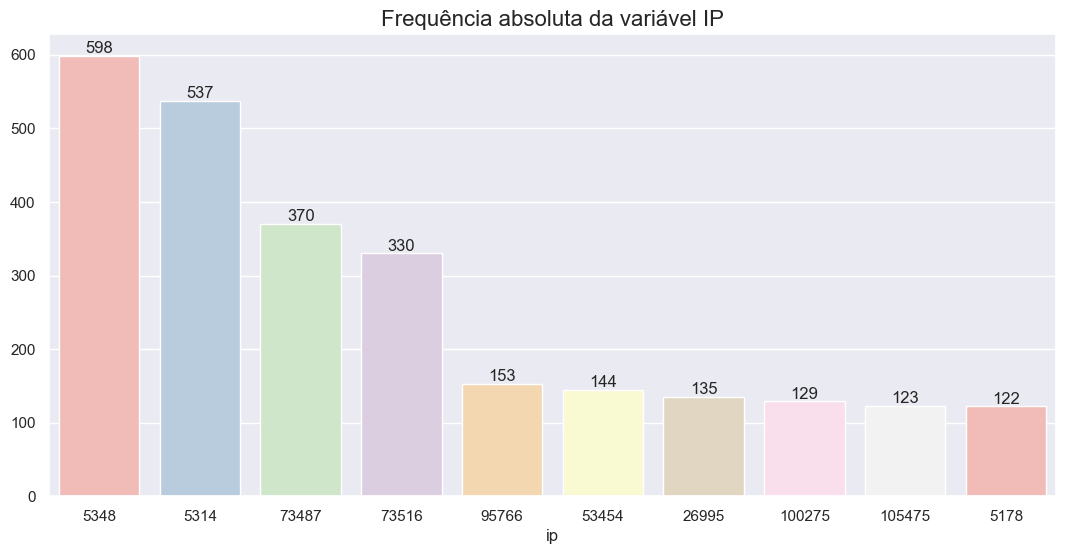

In [33]:
# Verificando os 10 números IP que aparecem com maior frequência
desenhaGraficoBarras(df.ip, 10, "IP")

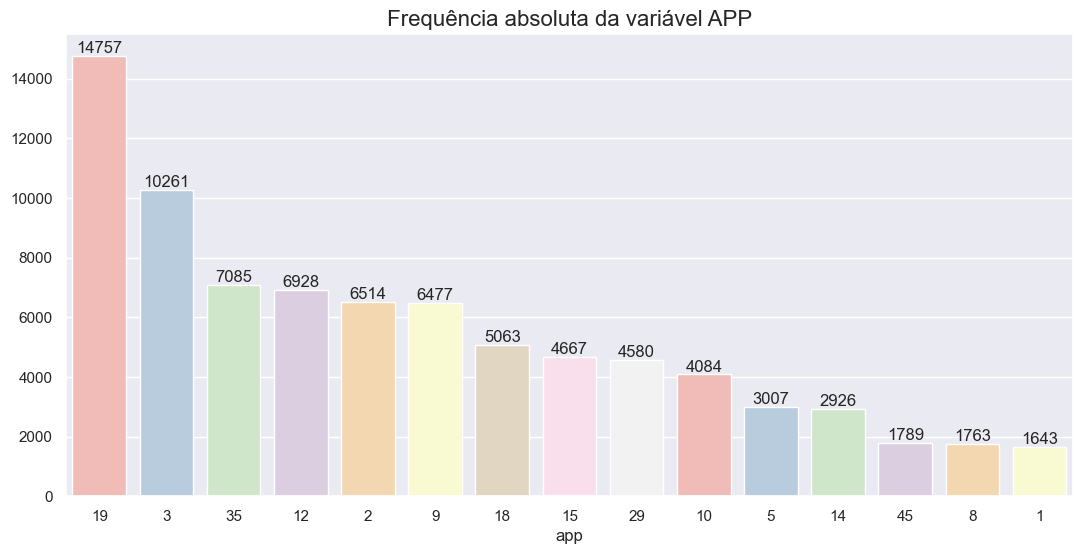

In [34]:
# Verificando os 15 APPs que aparecem com maior frequência
desenhaGraficoBarras(df.app, 15, "APP")

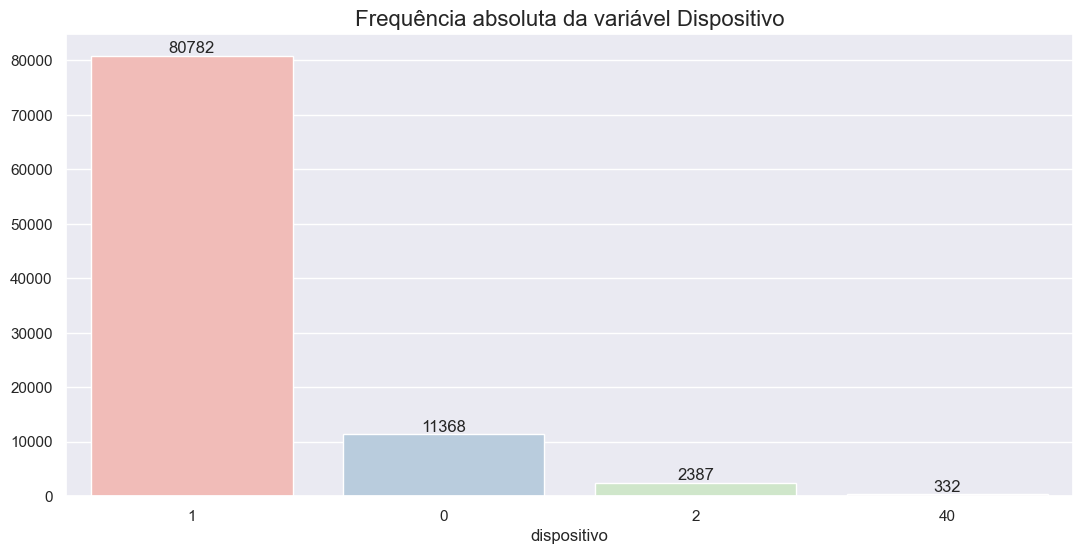

In [35]:
# Verificando os 4 dispositivos que aparecem com maior frequência
desenhaGraficoBarras(df.dispositivo, 4, "Dispositivo")

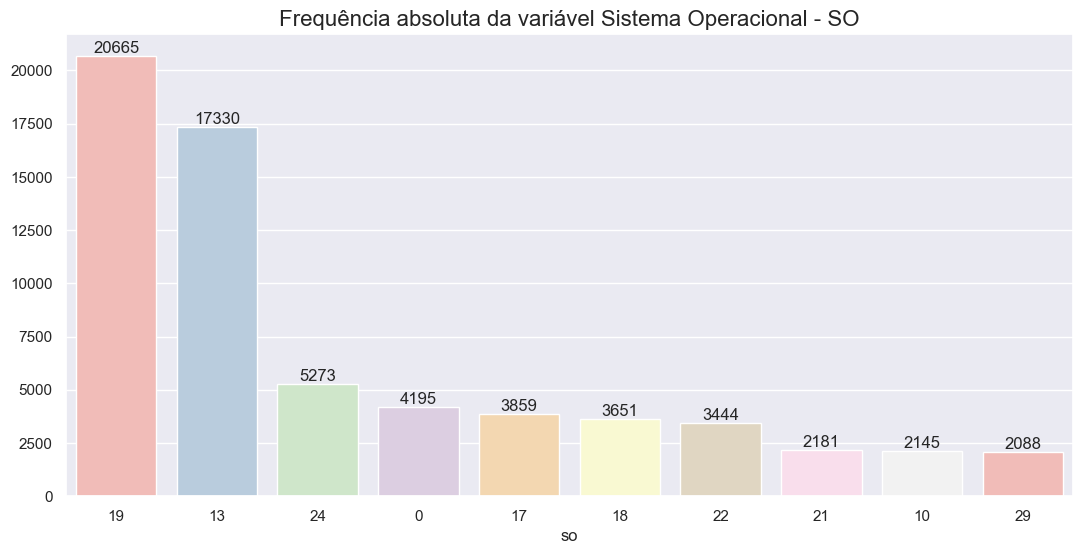

In [36]:
# Verificando os 10 Sistemas Operacionais - SO que aparecem com maior frequência
desenhaGraficoBarras(df.so, 10, "Sistema Operacional - SO")

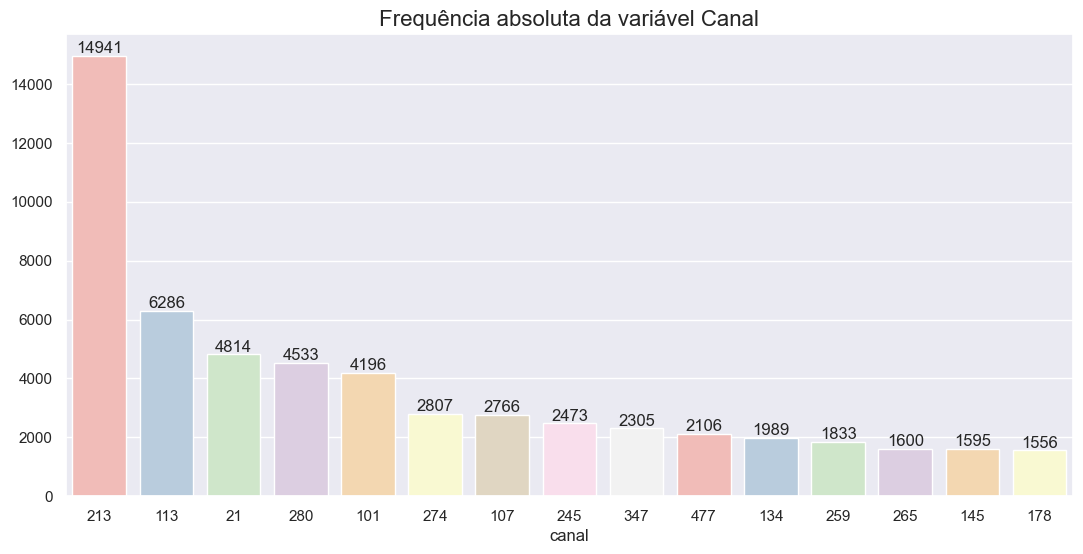

In [37]:
# Verificando os 15 canais que aparecem com maior frequência
desenhaGraficoBarras(df.canal, 15, "Canal")

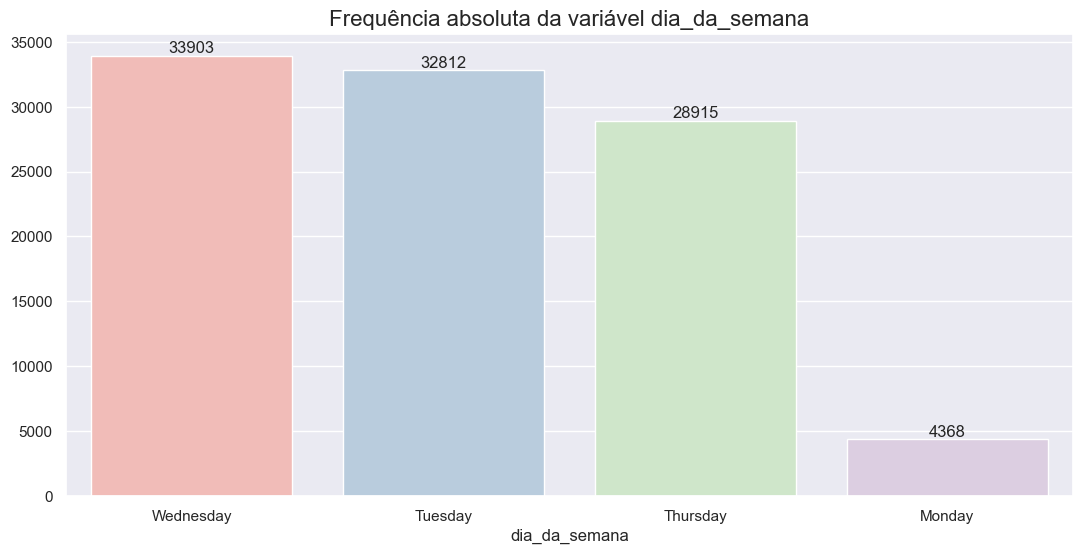

In [38]:
# Frequência absoluta dos dias da semana
desenhaGraficoBarras(df.dia_da_semana, 4, "dia_da_semana")

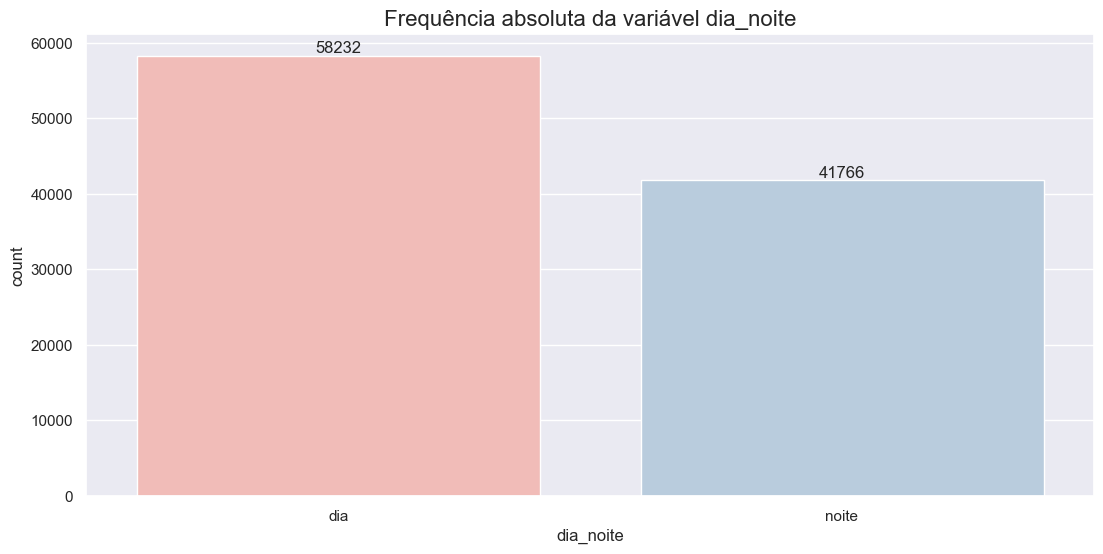

In [39]:
# Frequência absoluta da variável dia_noite
desenhaCountPlot(df.dia_noite, "dia_noite")

##### 4.6.4 Análise descritiva da variável alvo

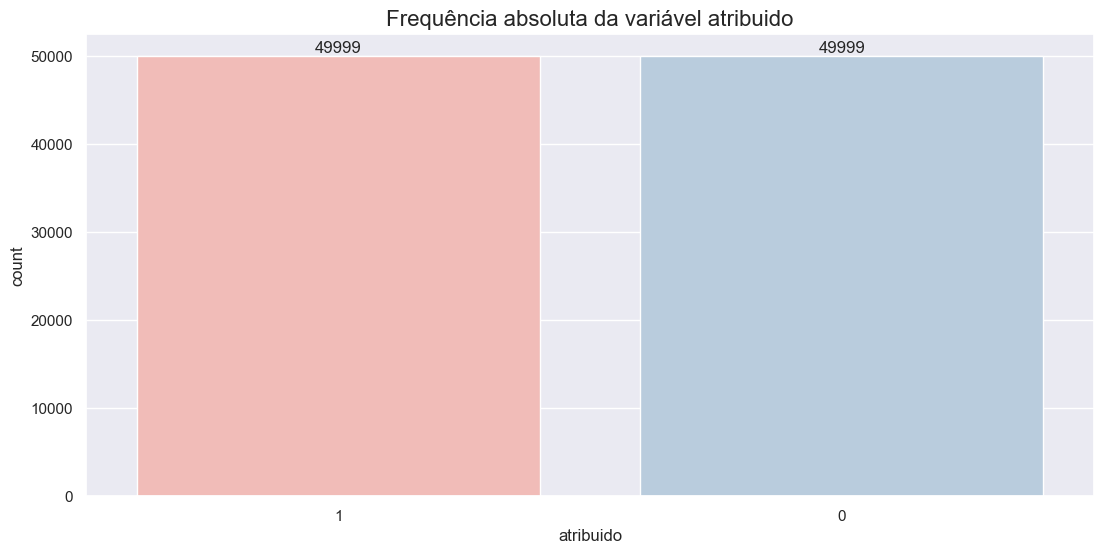

In [40]:
# Frequência absoluta 
desenhaCountPlot(df[variavelAlvo], variavelAlvo)

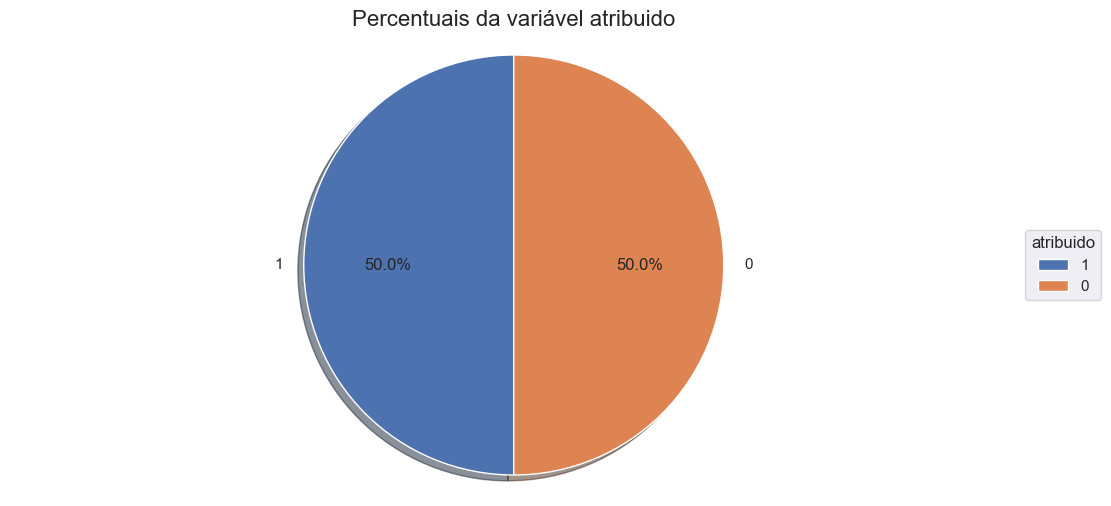

In [41]:
# Percentuais
desenhaPizza(df[variavelAlvo], variavelAlvo)

##### 4.6.5 - Analisar as variáveis preditoras de acordo com a variável alvo

##### a) Variável IP

In [42]:
# Calculando as frequências dos 10 números IP que aparecem com maior frequência
frequencias = df.ip.value_counts().sort_values(ascending=False).head(10)
frequencias

ip
5348      598
5314      537
73487     370
73516     330
95766     153
53454     144
26995     135
100275    129
105475    123
5178      122
Name: count, dtype: int64

In [43]:
# Separando as linhas 
dfAux = df[df["ip"].isin(frequencias.index)]
dfAux.head()

,ip,app,dispositivo,so,canal,horario_clique,horario_atribuido,dia_da_semana,hora_clique,dia_noite,atribuido
69,5348,29,1,13,343,2017-11-09 07:40:31,2017-11-09 07:41:15,Thursday,7,dia,1
171,5348,29,1,19,343,2017-11-07 02:35:15,2017-11-07 02:36:16,Tuesday,2,noite,1
172,73487,29,1,17,210,2017-11-08 14:07:36,2017-11-08 14:12:28,Wednesday,14,dia,1
185,73516,11,2,13,122,2017-11-09 04:49:44,2017-11-09 09:59:18,Thursday,4,noite,1
226,5314,9,1,19,232,2017-11-08 18:54:23,2017-11-08 18:56:34,Wednesday,18,dia,1


In [44]:
# Criando uma tabela de classificação cruzada das frequências absolutas. O parâmetro "margins" recebendo o valor True, inclui uma linha e uma coluna com os totais das frequências absolutas.
pd.crosstab(dfAux.atribuido, dfAux.ip, margins=True, margins_name="Total", rownames=["Atribuído"], colnames=["IP"])

IP,100275,105475,26995,5178,5314,53454,5348,73487,73516,95766,Total
Atribuído,,,,,,,,,,,
0,92,90,104,60,302,133,322,234,201,111,1649
1,37,33,31,62,235,11,276,136,129,42,992
Total,129,123,135,122,537,144,598,370,330,153,2641


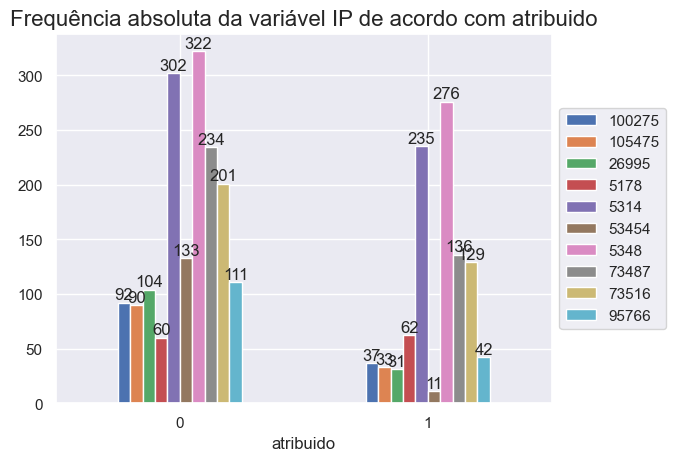

In [45]:
# Plot da Classificação cruzada
desenhaClassificacaoCruzada(dfAux.ip, "IP")

##### b) Variável app

In [46]:
# Calculando as frequências dos 15 APPs que aparecem com maior frequência
frequencias = df.app.value_counts().sort_values(ascending=False).head(15)
frequencias

app
19    14757
3     10261
35     7085
12     6928
2      6514
9      6477
18     5063
15     4667
29     4580
10     4084
5      3007
14     2926
45     1789
8      1763
1      1643
Name: count, dtype: int64

In [47]:
# Separando as linhas 
dfAux = df[df["app"].isin(frequencias.index)]
dfAux.head()

,ip,app,dispositivo,so,canal,horario_clique,horario_atribuido,dia_da_semana,hora_clique,dia_noite,atribuido
0,212020,5,1,61,113,2017-11-07 02:39:59,2017-11-07 02:40:32,Tuesday,2,noite,1
1,25614,19,0,38,213,2017-11-07 09:16:10,2017-11-07 10:29:09,Tuesday,9,dia,1
3,286256,5,1,26,113,2017-11-07 18:32:21,2017-11-07 18:32:51,Tuesday,18,dia,1
4,120597,19,0,50,213,2017-11-09 11:23:38,2017-11-09 14:28:41,Thursday,11,dia,1
5,235938,29,1,8,213,2017-11-08 05:23:41,2017-11-08 05:26:00,Wednesday,5,noite,1


In [48]:
# Criando uma tabela de classificação cruzada das frequências absolutas. O parâmetro "margins" recebendo o valor True, inclui uma linha e uma coluna com os totais das frequências absolutas.
pd.crosstab(dfAux.atribuido, dfAux.app, margins=True, margins_name="Total", rownames=["Atribuído"], colnames=["App"])

App,1,10,12,14,15,18,19,2,29,3,35,45,5,8,9,Total
Atribuído,,,,,,,,,,,,,,,,
0,1531,201,6643,2670,4285,4161,208,5887,159,9195,7,13,69,1041,4489,40559
1,112,3883,285,256,382,902,14549,627,4421,1066,7078,1776,2938,722,1988,40985
Total,1643,4084,6928,2926,4667,5063,14757,6514,4580,10261,7085,1789,3007,1763,6477,81544


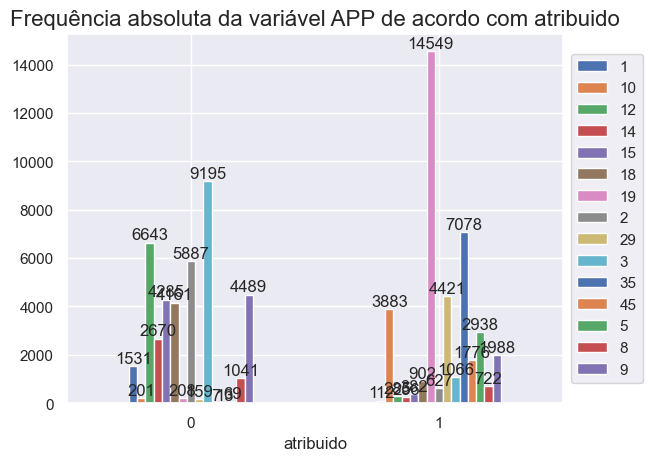

In [49]:
# Plot da Classificação cruzada
desenhaClassificacaoCruzada(dfAux.app, "APP")

##### c) Variável dispositivo

In [50]:
# Calculando as frequências dos 4 dispositivos que aparecem com maior frequência
frequencias = df.dispositivo.value_counts().sort_values(ascending=False).head(4)
frequencias

dispositivo
1     80782
0     11368
2      2387
40      332
Name: count, dtype: int64

In [51]:
# Separando as linhas 
dfAux = df[df.dispositivo.isin(frequencias.index)]
dfAux.head()

,ip,app,dispositivo,so,canal,horario_clique,horario_atribuido,dia_da_semana,hora_clique,dia_noite,atribuido
0,212020,5,1,61,113,2017-11-07 02:39:59,2017-11-07 02:40:32,Tuesday,2,noite,1
1,25614,19,0,38,213,2017-11-07 09:16:10,2017-11-07 10:29:09,Tuesday,9,dia,1
2,73015,11,1,19,319,2017-11-09 03:01:58,2017-11-09 04:31:03,Thursday,3,noite,1
3,286256,5,1,26,113,2017-11-07 18:32:21,2017-11-07 18:32:51,Tuesday,18,dia,1
4,120597,19,0,50,213,2017-11-09 11:23:38,2017-11-09 14:28:41,Thursday,11,dia,1


In [52]:
# Criando uma tabela de classificação cruzada das frequências absolutas. O parâmetro "margins" recebendo o valor True, inclui uma linha e uma coluna com os totais das frequências absolutas.
pd.crosstab(dfAux.atribuido, dfAux.dispositivo, margins=True, margins_name="Total", rownames=["Atribuído"], colnames=["Dispositivo"])

Dispositivo,0,1,2,40,Total
Atribuído,,,,,
0,240,47237,2138,2,49617
1,11128,33545,249,330,45252
Total,11368,80782,2387,332,94869


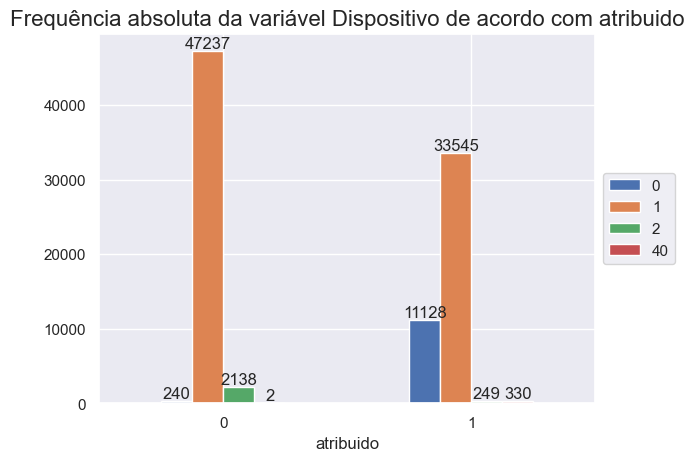

In [53]:
# Plot da Classificação cruzada
desenhaClassificacaoCruzada(dfAux.dispositivo, "Dispositivo")

##### d) Variável so

In [54]:
# Calculando as frequências dos 10 sistemas operacionais que aparecem com maior frequência
frequencias = df.so.value_counts().sort_values(ascending=False).head(10)
frequencias

so
19    20665
13    17330
24     5273
0      4195
17     3859
18     3651
22     3444
21     2181
10     2145
29     2088
Name: count, dtype: int64

In [55]:
# Separando as linhas 
dfAux = df[df.so.isin(frequencias.index)]
dfAux.head()

,ip,app,dispositivo,so,canal,horario_clique,horario_atribuido,dia_da_semana,hora_clique,dia_noite,atribuido
2,73015,11,1,19,319,2017-11-09 03:01:58,2017-11-09 04:31:03,Thursday,3,noite,1
8,308802,3,1,13,466,2017-11-09 13:21:25,2017-11-09 15:28:40,Thursday,13,dia,1
9,199024,8,1,19,140,2017-11-07 23:29:14,2017-11-08 00:10:24,Tuesday,23,noite,1
11,29567,19,18,0,213,2017-11-09 09:43:33,2017-11-09 09:51:38,Thursday,9,dia,1
12,163550,72,1,17,101,2017-11-07 15:10:20,2017-11-07 15:17:12,Tuesday,15,dia,1


In [56]:
# Criando uma tabela de classificação cruzada das frequências absolutas. O parâmetro "margins" recebendo o valor True, inclui uma linha e uma coluna com os totais das frequências absolutas.
pd.crosstab(dfAux.atribuido, dfAux.so, margins=True, margins_name="Total", rownames=["Atribuído"], colnames=["SO"])

SO,0,10,13,17,18,19,21,22,24,29,Total
Atribuído,,,,,,,,,,,
0,92,1410,10574,2651,2415,11957,30,1976,73,22,31200
1,4103,735,6756,1208,1236,8708,2151,1468,5200,2066,33631
Total,4195,2145,17330,3859,3651,20665,2181,3444,5273,2088,64831


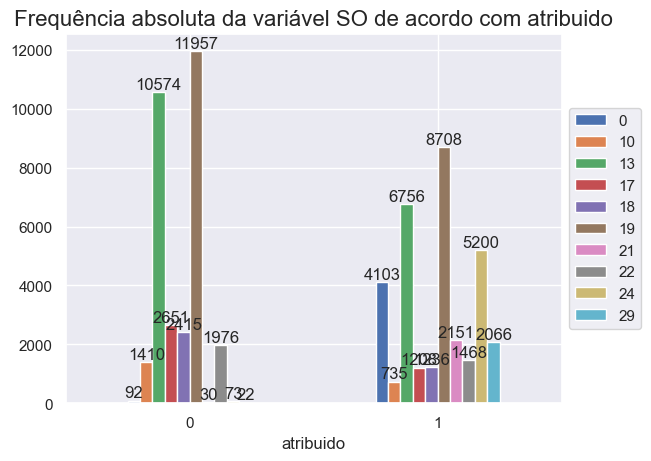

In [57]:
# Plot da Classificação cruzada
desenhaClassificacaoCruzada(dfAux.so, "SO")

##### e) Variável canal

In [58]:
# Calculando as frequências dos 15 canais que aparecem com maior frequência
frequencias = df.canal.value_counts().sort_values(ascending=False).head(15)
frequencias

canal
213    14941
113     6286
21      4814
280     4533
101     4196
274     2807
107     2766
245     2473
347     2305
477     2106
134     1989
259     1833
265     1600
145     1595
178     1556
Name: count, dtype: int64

In [59]:
# Separando as linhas 
dfAux = df[df.canal.isin(frequencias.index)]
dfAux.head()

,ip,app,dispositivo,so,canal,horario_clique,horario_atribuido,dia_da_semana,hora_clique,dia_noite,atribuido
0,212020,5,1,61,113,2017-11-07 02:39:59,2017-11-07 02:40:32,Tuesday,2,noite,1
1,25614,19,0,38,213,2017-11-07 09:16:10,2017-11-07 10:29:09,Tuesday,9,dia,1
3,286256,5,1,26,113,2017-11-07 18:32:21,2017-11-07 18:32:51,Tuesday,18,dia,1
4,120597,19,0,50,213,2017-11-09 11:23:38,2017-11-09 14:28:41,Thursday,11,dia,1
5,235938,29,1,8,213,2017-11-08 05:23:41,2017-11-08 05:26:00,Wednesday,5,noite,1


In [60]:
# Criando uma tabela de classificação cruzada das frequências absolutas. O parâmetro "margins" recebendo o valor True, inclui uma linha e uma coluna com os totais das frequências absolutas.
pd.crosstab(dfAux.atribuido, dfAux.canal, margins=True, margins_name="Total", rownames=["Atribuído"], colnames=["Canal"])

Canal,101,107,113,134,145,178,21,213,245,259,265,274,280,347,477,Total
Atribuído,,,,,,,,,,,,,,,,
0,574,2301,119,1609,1023,1495,78,182,2373,1592,1520,2,4085,233,1980,19166
1,3622,465,6167,380,572,61,4736,14759,100,241,80,2805,448,2072,126,36634
Total,4196,2766,6286,1989,1595,1556,4814,14941,2473,1833,1600,2807,4533,2305,2106,55800


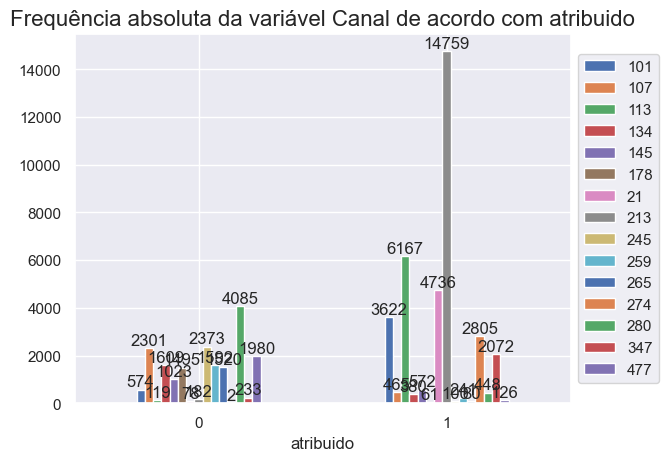

In [61]:
# Plot da Classificação cruzada
desenhaClassificacaoCruzada(dfAux.canal, "Canal")

##### f) Variável dia_da_semana

In [62]:
# Criando uma tabela de classificação cruzada das frequências absolutas.
pd.crosstab(df.atribuido, df.dia_da_semana, margins=True, margins_name="Total", rownames=["Atribuído"], colnames=["Dia da semana"])

Dia da semana,Monday,Thursday,Tuesday,Wednesday,Total
Atribuído,,,,,
0,2533,14290,16290,16886,49999
1,1835,14625,16522,17017,49999
Total,4368,28915,32812,33903,99998


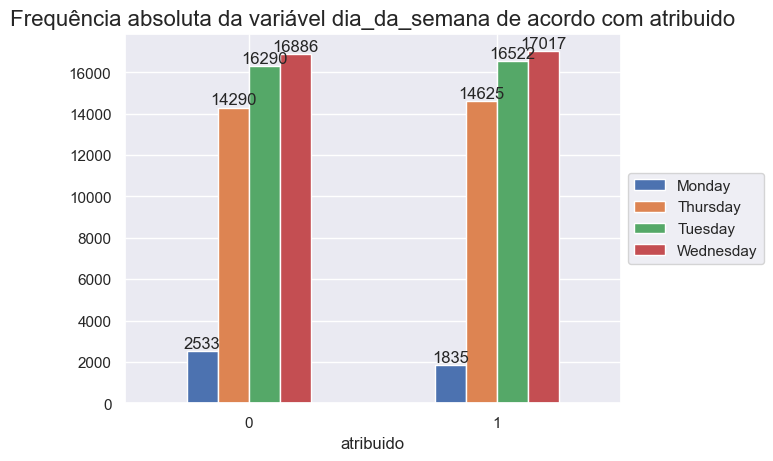

In [63]:
# Plot da Classificação cruzada
desenhaClassificacaoCruzada(df.dia_da_semana, "dia_da_semana")

##### g) Variável dia_noite

In [64]:
# Criando uma tabela de classificação cruzada das frequências absolutas.
pd.crosstab(df.atribuido, df.dia_noite, margins=True, margins_name="Total", rownames=["Atribuído"], colnames=["Dia/noite"])

Dia/noite,dia,noite,Total
Atribuído,,,
0,29514,20485,49999
1,28718,21281,49999
Total,58232,41766,99998


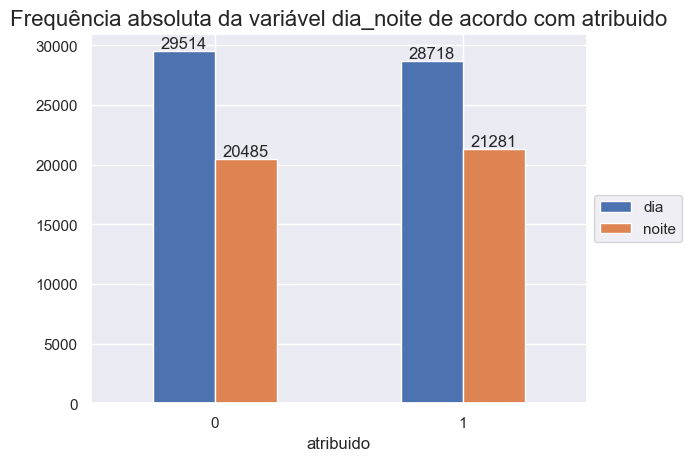

In [65]:
# Plot da Classificação cruzada
desenhaClassificacaoCruzada(df.dia_noite, "dia_noite")

In [66]:
# Excluindo DataFrame para liberar memória
del dfAux

## 5 - Transformando os dados

In [67]:
# Faz uma cópia do dataframe
df2 = df.copy()

### 5.1 Tratando valores iguais a zero

In [68]:
# Verificando as colunas que possuem valores iguais a zero
# Loop que percorre todas as colunas
# A notação de slicing [0:10] é para não incluir a variável alvo, porque apesar de ter números, a variável alvo é categórica
for k in df2.columns[0:10]:
    # Imprime na tela a quantidade de valores iguais a zero existentes na coluna
    print(k + ":", len(df2[df2[k] == 0]))

ip: 0
app: 0
dispositivo: 0
so: 0
canal: 0
horario_clique: 0
horario_atribuido: 0
dia_da_semana: 0
hora_clique: 5142
dia_noite: 0


### 5.2 - Tratando espaço em branco

In [69]:
# Verificando as colunas que possuem espaço em branco
# Loop que percorre todas as colunas
# A notação de slicing [0:10] é para não incluir a variável alvo, porque apesar de ter números, a variável alvo é categórica
for k in df2.columns[0:10]:
    # Imprime na tela a quantidade de espaço em branco existentes na coluna
    print(k + ":", len(df2[df2[k] == ''])) 

ip: 0
app: 0
dispositivo: 0
so: 0
canal: 0
horario_clique: 0
horario_atribuido: 49999
dia_da_semana: 0
hora_clique: 0
dia_noite: 0


In [70]:
# Excluindo uma coluna
df2.drop(["horario_atribuido"],  axis=1, inplace = True)
df2.head()

,ip,app,dispositivo,so,canal,horario_clique,dia_da_semana,hora_clique,dia_noite,atribuido
0,212020,5,1,61,113,2017-11-07 02:39:59,Tuesday,2,noite,1
1,25614,19,0,38,213,2017-11-07 09:16:10,Tuesday,9,dia,1
2,73015,11,1,19,319,2017-11-09 03:01:58,Thursday,3,noite,1
3,286256,5,1,26,113,2017-11-07 18:32:21,Tuesday,18,dia,1
4,120597,19,0,50,213,2017-11-09 11:23:38,Thursday,11,dia,1


### 5.3 - Convertendo variáveis categóricas em números

#### 5.3.1 Convertendo as variáveis preditoras de texto para número

In [71]:
# Cria o objeto encoder
encoder = LabelEncoder()

# Convertendo as variáveis categóricas para número
df2["dia_da_semana"] = encoder.fit_transform(df2["dia_da_semana"])
df2["dia_noite"] = encoder.fit_transform(df2["dia_noite"])
df2.head()

,ip,app,dispositivo,so,canal,horario_clique,dia_da_semana,hora_clique,dia_noite,atribuido
0,212020,5,1,61,113,2017-11-07 02:39:59,2,2,1,1
1,25614,19,0,38,213,2017-11-07 09:16:10,2,9,0,1
2,73015,11,1,19,319,2017-11-09 03:01:58,1,3,1,1
3,286256,5,1,26,113,2017-11-07 18:32:21,2,18,0,1
4,120597,19,0,50,213,2017-11-09 11:23:38,1,11,0,1


In [72]:
# Excluindo coluna desnecessária
df2.drop(["horario_clique"],  axis=1, inplace = True)
df2.head()

,ip,app,dispositivo,so,canal,dia_da_semana,hora_clique,dia_noite,atribuido
0,212020,5,1,61,113,2,2,1,1
1,25614,19,0,38,213,2,9,0,1
2,73015,11,1,19,319,1,3,1,1
3,286256,5,1,26,113,2,18,0,1
4,120597,19,0,50,213,1,11,0,1


## 6 - Dividindo os dados em treino e teste

In [73]:
# Fazendo uma cópia do dataframa
dfDados = df2.copy()

In [74]:
# Separando as variáveis preditoras e a variável alvo
numeroObservacoes = len(dfDados)
numeroVariaveisPreditoras = len(dfDados.columns)-1

# A notação de slicing [0:8] é para não incluir a variável alvo
X = dfDados[dfDados.columns[0:8]].values.reshape((numeroObservacoes, numeroVariaveisPreditoras)) # X deve sempre ser uma matriz e nunca um vetor
y = dfDados[variavelAlvo].values # y pode ser um vetor

In [75]:
# Pesquisa os melhores valores para o parâmetro random_state
# Array de valores para random_state de 1 até 200
arrayRandomStates = np.arange(start=1, stop=200)

# Cria uma lista vazia para armazenar os acertos
listaAcertos = []

# Loop que percorre todos os valores da arrayRandomStates
for k in arrayRandomStates:
    Xtreino, Xteste, Ytreino, Yteste = train_test_split(X, y, test_size = 0.2, random_state=k, stratify=y)
    modelo = LogisticRegression()
    modelo.fit(Xtreino, Ytreino)
    previsoes = modelo.predict(Xteste)
    listaAcertos.append(accuracy_score(Yteste, previsoes, normalize=False))
    
# Exibe os melhores valores para o random_state
resultados = pd.DataFrame({'random_state':arrayRandomStates, 
                           'Acertos':listaAcertos})
melhorRandomState = resultados[resultados['Acertos'] == resultados['Acertos'].max()]
melhorRandomState

,random_state,Acertos
42,43,15141


In [76]:
# Divide os dados em treino e teste
Xtreino, Xteste, Ytreino, Yteste = train_test_split(X, y, test_size = 0.2, random_state=int(melhorRandomState["random_state"][0:1].values), stratify=y)

## 7 - Seleção de variáveis

### 7.1 - Selecionado as melhores variáveis com o Random Forest Classifier

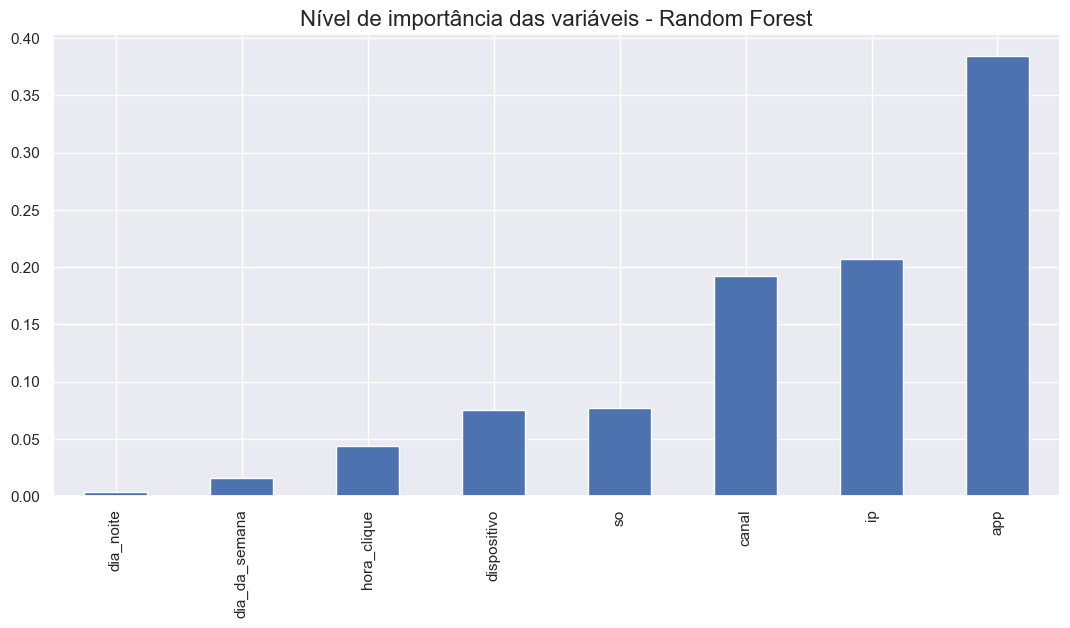

In [77]:
# Criando o modelo
randomForestClassifier = RandomForestClassifier(random_state=0)

# Treinando o modelo
randomForestClassifier.fit(X, y)

# Atribuindo a importância das variáveis a uma Series do Pandas
importanciaVariaveis = pd.Series(data = randomForestClassifier.feature_importances_, index = dfDados.columns[0:8])

# Gráfico com a importância das variáveis
fig = plt.subplots(figsize=(13, 6))
importanciaVariaveis.sort_values().plot.bar()
plt.title("Nível de importância das variáveis - Random Forest", fontsize = 16)
plt.xticks(rotation=90)
plt.show()

### 7.2 - Selecionado as melhores variáveis com o SelectKBest

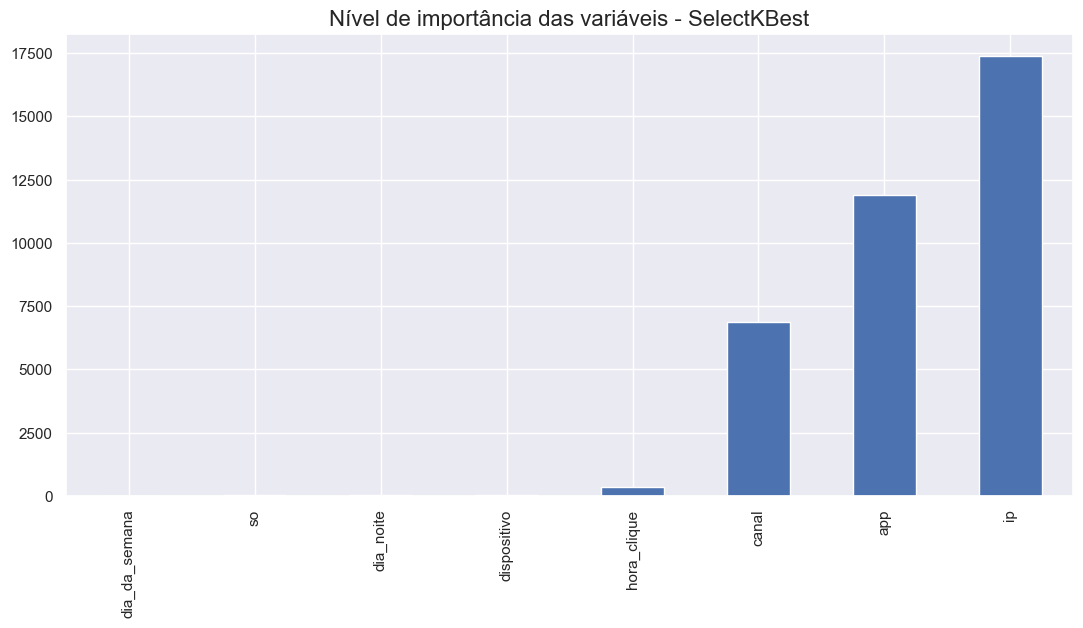

In [78]:
# Cria o objeto SelectKBest
selectkBest = SelectKBest(k = 4)

# Executa a função em (X, y) e obtém as variáveis selecionadas
selectkBestTreinado = selectkBest.fit(X, y)

# Atribuindo a importância das variáveis a uma Series do Pandas
importanciaVariaveis = pd.Series(data = selectkBestTreinado.scores_, index = dfDados.columns[0:8])

# Gráfico com a importância das variáveis
fig = plt.subplots(figsize=(13, 6))
importanciaVariaveis.sort_values().plot.bar()
plt.title("Nível de importância das variáveis - SelectKBest", fontsize = 16)
plt.xticks(rotation=90)
plt.show()

### 7.3 - Selecionado as melhores variáveis com Eliminação Recursiva de Atributos RFE 

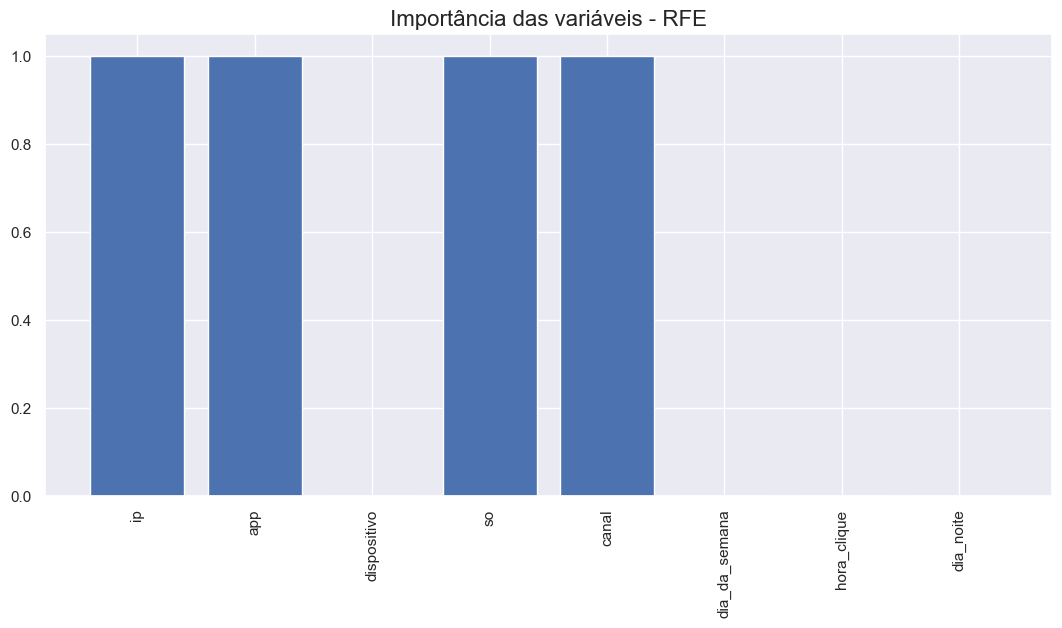

In [79]:
# Criando o modelo
extraTreeClassifier = ExtraTreeClassifier(random_state=0)

# Treinando o modelo
extraTreeClassifier.fit(X, y)

# Criando Eliminação Recursiva de Atributos RFE
eliminacaoRecursiva = RFE(extraTreeClassifier)

# Treinando Eliminação Recursiva de Atributos RFE
eliminacaoRecursivaTreinada = eliminacaoRecursiva.fit(X, y)

# Gráfico com a importância das variáveis
fig = plt.subplots(figsize=(13, 6))
plt.title("Importância das variáveis - RFE", fontsize = 16)
# A notação de slicing [0:8] é para não incluir a variável alvo
plt.bar(dfDados.columns[0:8], eliminacaoRecursivaTreinada.support_)
plt.xticks(rotation=90)
plt.show()

## 8 - Dividindo os dados de treino e teste com as variáveis selecionadas

In [80]:
# Variáveis selecionadas
variaveisSelecionadas = ["ip", "app", "dispositivo", "so",  "canal", "hora_clique"]

In [81]:
# Separando as variáveis preditoras e a variável alvo
numeroObservacoes = len(dfDados)
numeroVariaveisPreditoras = len(variaveisSelecionadas)
X = dfDados[variaveisSelecionadas].values.reshape((numeroObservacoes, numeroVariaveisPreditoras)) # X deve sempre ser uma matriz e nunca um vetor
y = dfDados[variavelAlvo].values # y pode ser um vetor

In [82]:
# Pesquisa os melhores valores para o parâmetro random_state
# Array de valores para random_state de 1 até 100
arrayRandomStates = np.arange(start=1, stop=200)

# Cria uma lista vazia para armazenar os acertos
listaAcertos = []

# Loop que percorre todos os valores da arrayRandomStates
for k in arrayRandomStates:
    Xtreino, Xteste, Ytreino, Yteste = train_test_split(X, y, test_size = 0.2, random_state=k, stratify=y)
    modelo = LogisticRegression()
    modelo.fit(Xtreino, Ytreino)
    previsoes = modelo.predict(Xteste)
    listaAcertos.append(accuracy_score(Yteste, previsoes, normalize=False))
    
# Exibe os melhores valores para o random_state
resultados = pd.DataFrame({'random_state':arrayRandomStates, 
                           'Acertos':listaAcertos})
melhorRandomState = resultados[resultados['Acertos'] == resultados['Acertos'].max()]
melhorRandomState

,random_state,Acertos
75,76,15113


In [83]:
# Divide os dados em treino e teste BALANCEAMENTO DAS CLASSES COM stratify=y
Xtreino, Xteste, Ytreino, Yteste = train_test_split(X, y, test_size = 0.2, random_state=int(melhorRandomState["random_state"][0:1].values), stratify=y)

## 9 - Balanceamento de classes

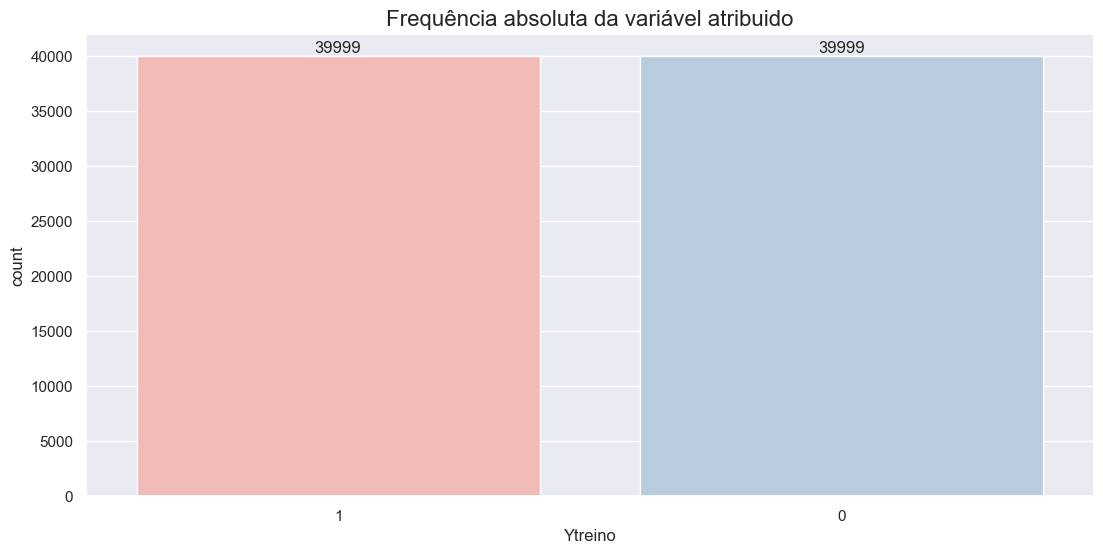

In [84]:
# Criando DataFrame de Ytreino
# Criamos este DataFrame porque a função desenhaCountPlot espera receber uma coluna de um DataFrame
dfYtreino = pd.DataFrame(Ytreino, columns=["Ytreino"])
dfYtreino

# Countplot da variável alvo no DATASET DE TREINO
desenhaCountPlot(dfYtreino.Ytreino, variavelAlvo)

## 10 - Preparando os dados

### 10.1 - Normalizando os dados

In [ ]:
# Cria o objeto da classe MinMaxScaler 
min_max_scaler = MinMaxScaler()

# Realiza a normalização dimensionando as variáveis em uma escala entre 0 e 1 nos dados de  Xtreino
XtreinoNormalizados = min_max_scaler.fit_transform(Xtreino)

# Realiza a normalização dimensionando as variáveis em uma escala entre 0 e 1 nos dados de Xteste
XtesteNormalizados = min_max_scaler.fit_transform(Xteste)

### 10.2 - Padronizando os dados

In [ ]:
# Cria o objeto StandardScaler, calcula a média e o desvio-padrão que serão usados para padronizar os dados
scaler = StandardScaler()

# Realiza a padronização centralizando e dimensionando dados nos dados de Xtreino
XtreinoPadronizados = scaler.fit_transform(Xtreino)

# Realiza a padronização centralizando e dimensionando dados nos dados de Xteste
XtestePadronizados = scaler.fit_transform(Xteste)

### 10.3 - Selecionando a apresentação dos dados

In [85]:
# Os dados podem estar com apresentação "Originais", "Normalizados" ou "Padronizados"
apresentacaoDosDados = "Originais"

if apresentacaoDosDados == "Originais":
    dadosXtreino = Xtreino
    dadosXteste = Xteste
elif apresentacaoDosDados == "Normalizados":
    dadosXtreino = XtreinoNormalizados
    dadosXteste = XtesteNormalizados
else:
    dadosXtreino = XtreinoPadronizados
    dadosXteste = XtestePadronizados

print("Os dados estão com a seguinte apresentação:", apresentacaoDosDados)

Os dados estão com a seguinte apresentação: Originais


In [86]:
# Marca o início da execução 
inicio = datetime.now()

## 11 - Criando os modelos de classificação

In [87]:
# DataFrame para comparar a acurácia de cada algoritmo
comparaAlgoritmo = {"Algoritmo": ["Regressão Logística", "Linear Discriminant Analysis", "KNN", "Naive Bayes", "Árvore de Decisão", "SVM", "Random Forest",
                                 "Bagging Classifier", "AdaBoost", "Voting Classifier", "Gradient Tree Boosting", "XGBoost"],
                   "Acurácia": ["-", "-", "-", "-", "-", 0,"-", "-", "-", 0, "-", "-"],
                   "Acertos": ["-", "-", "-", "-", "-", 0,"-", "-", "-", 0, "-", "-"],
                   "Erros": ["-", "-", "-", "-", "-", 0,"-", "-", "-", 0, "-", "-"],
                   "Precisao":["-", "-", "-", "-", "-", 0,"-", "-", "-", 0, "-", "-"],
                   "Recall": ["-", "-", "-", "-", "-", 0,"-", "-", "-", 0, "-", "-"],
                   "F1 score": ["-", "-", "-", "-", "-", 0,"-", "-", "-", 0, "-", "-"],
                   "Curva ROC": ["-", "-", "-", "-", "-", 0,"-", "-", "-", 0, "-", "-"]}
dfComparaAlgoritmo = pd.DataFrame(comparaAlgoritmo)
dfComparaAlgoritmo

,Algoritmo,Acurácia,Acertos,Erros,Precisao,Recall,F1 score,Curva ROC
0,Regressão Logística,-,-,-,-,-,-,-
1,Linear Discriminant Analysis,-,-,-,-,-,-,-
2,KNN,-,-,-,-,-,-,-
3,Naive Bayes,-,-,-,-,-,-,-
4,Árvore de Decisão,-,-,-,-,-,-,-
5,SVM,0,0,0,0,0,0,0
6,Random Forest,-,-,-,-,-,-,-
7,Bagging Classifier,-,-,-,-,-,-,-
8,AdaBoost,-,-,-,-,-,-,-
9,Voting Classifier,0,0,0,0,0,0,0


### 11.1 - Regressão Logística

In [88]:
# Cria um dicionário com os valores que serão testados como parâmetro
parametros = {
    "penalty": ['l1', 'l2', 'elasticnet', 'none'],
    "solver": ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    "C": [0.001,0.01,0.1,1.0,10,100,1000]
}

# Cria o modelo que desejamos testar os melhores parâmetros
regressaoLogistica = LogisticRegression()

# Cria o objeto do tipo RandomizedSearchCV
randomizedSearch = RandomizedSearchCV(estimator = regressaoLogistica, param_distributions = parametros, random_state = 11)

# Treinando os parâmetros. ATENÇÃO: Deve-se usar todo conjunto de dados.
randomizedSearch.fit(X, y)

# Salvando os melhores parâmetros em uma lista
melhoresParametrosLR = []
for k in randomizedSearch.best_params_:
    melhoresParametrosLR.append(randomizedSearch.best_params_[k])

# Print do resultado
print("Acurácia média: %.3f" % (randomizedSearch.best_score_ * 100) + "%")
print("Melhores parâmetros para o modelo:", randomizedSearch.best_params_)

Acurácia média: 74.661%
Melhores parâmetros para o modelo: {'solver': 'lbfgs', 'penalty': 'none', 'C': 100}


In [89]:
# Utilizando os melhores parâmetros segundo o RandomizedSearchCV
# Criando o modelo
regressaoLogistica = LogisticRegression(solver = melhoresParametrosLR[0], penalty = melhoresParametrosLR[1], C = melhoresParametrosLR[2])

# Treinamento do modelo
regressaoLogistica.fit(dadosXtreino, Ytreino)

# Previsões com os dados de teste
previsoes = regressaoLogistica.predict(dadosXteste)

# Calculando a acurácia do modelo
numeroAcertos = accuracy_score(Yteste, previsoes, normalize=False)
numeroErros = len(Yteste)-numeroAcertos
acuracia = numeroAcertos/len(Yteste)

# Calculando acurácia
print("Acurácia: %.2f" % (acuracia * 100) + "%")
print("Número de acertos:", numeroAcertos)
print("Número de erros:", numeroErros)

# Calculando a precisão do modelo
# O parâmetro average='macro' calcula as métricas para cada classe e encontra sua média não ponderada.
precisao = precision_score(Yteste, previsoes, average='macro')
print("Precisão: %.2f" % (precisao * 100) + "%")

# Calculando o recall do modelo
# O parâmetro average='macro' calcula as métricas para cada classe e encontra sua média não ponderada.
recall = recall_score(Yteste, previsoes, average='macro')
print("Recall: %.2f" % (recall * 100) + "%")

# Calculando o f1 score do modelo
# O parâmetro average='macro' calcula as métricas para cada classe e encontra sua média não ponderada.
f1Score = f1_score(Yteste, previsoes, average='macro')
print("F1 score: %.2f" % (f1Score * 100) + "%")

# Calculando a área abaixo da curva.
# Observe que é necessário fazer as previsões novamente com o método predict_proba. Este método estima a probabilidade das classes.
roc = roc_auc_score(Yteste, regressaoLogistica.predict_proba(Xteste)[:, 1])
print("Curva ROC: %.2f" % (roc * 100) + "%")

Acurácia: 74.61%
Número de acertos: 14922
Número de erros: 5078
Precisão: 74.75%
Recall: 74.61%
F1 score: 74.58%
Curva ROC: 82.56%


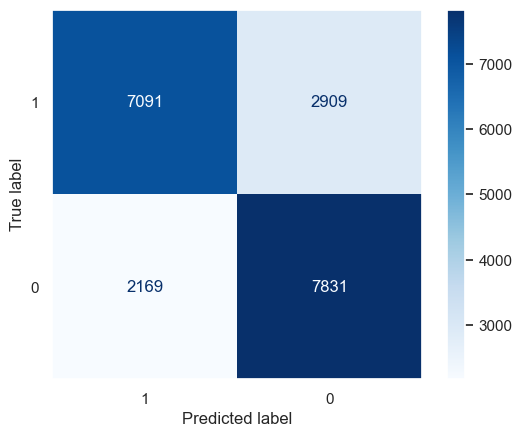

In [90]:
# Visualizando a matriz de confusão
desenhaMatrizConfusao(Yteste, previsoes, regressaoLogistica)

In [91]:
# Atualizando o dataframe com o desempenho dos algoritmos
dfComparaAlgoritmo.iloc[0,1] = "%.2f" % (acuracia * 100) + "%"
dfComparaAlgoritmo.iloc[0,2] = numeroAcertos
dfComparaAlgoritmo.iloc[0,3] = numeroErros
dfComparaAlgoritmo.iloc[0,4] = "%.2f" % (precisao * 100) + "%"
dfComparaAlgoritmo.iloc[0,5] = "%.2f" % (recall * 100) + "%"
dfComparaAlgoritmo.iloc[0,6] = "%.2f" % (f1Score * 100) + "%"
dfComparaAlgoritmo.iloc[0,7] = "%.2f" % (roc * 100) + "%"
dfComparaAlgoritmo

,Algoritmo,Acurácia,Acertos,Erros,Precisao,Recall,F1 score,Curva ROC
0,Regressão Logística,74.61%,14922,5078,74.75%,74.61%,74.58%,82.56%
1,Linear Discriminant Analysis,-,-,-,-,-,-,-
2,KNN,-,-,-,-,-,-,-
3,Naive Bayes,-,-,-,-,-,-,-
4,Árvore de Decisão,-,-,-,-,-,-,-
5,SVM,0,0,0,0,0,0,0
6,Random Forest,-,-,-,-,-,-,-
7,Bagging Classifier,-,-,-,-,-,-,-
8,AdaBoost,-,-,-,-,-,-,-
9,Voting Classifier,0,0,0,0,0,0,0


### 11.2 - Linear Discriminant Analysis

In [92]:
# Pesquisando os melhores parâmetros com RandomizedSearchCV
# Cria um dicionário com os valores que serão testados como parâmetro
parametros = {
    "solver": ['svd', 'lsqr', 'eigen'],
    "shrinkage": [0.001,0.01,0.1,0.5,0.8,0.2]
}

# Cria o modelo que desejamos testar os melhores parâmetros
linearDiscriminantAnalysis = LinearDiscriminantAnalysis()

# Cria o objeto do tipo RandomizedSearchCV
randomizedSearch = RandomizedSearchCV(estimator = linearDiscriminantAnalysis, param_distributions = parametros, random_state = 11)

# Treinando os parâmetros. ATENÇÃO: Deve-se usar todo conjunto de dados.
randomizedSearch.fit(X, y)

# Salvando os melhores parâmetros em uma lista
melhoresParametros = []
for k in randomizedSearch.best_params_:
    melhoresParametros.append(randomizedSearch.best_params_[k])

# Print do resultado
print("Acurácia média: %.3f" % (randomizedSearch.best_score_ * 100) + "%")
print("Melhores parâmetros para o modelo:", randomizedSearch.best_params_)

Acurácia média: 68.987%
Melhores parâmetros para o modelo: {'solver': 'eigen', 'shrinkage': 0.01}


In [93]:
# Utilizando os melhores parâmetros segundo o RandomizedSearchCV
# Criando o modelo
linearDiscriminantAnalysis = LinearDiscriminantAnalysis(solver=melhoresParametros[0], shrinkage=melhoresParametros[1])

# Treinamento do modelo
linearDiscriminantAnalysis.fit(dadosXtreino, Ytreino)

# Previsões com os dados de teste
previsoes = linearDiscriminantAnalysis.predict(dadosXteste)

# Calculando a acurácia do modelo
numeroAcertos = accuracy_score(Yteste, previsoes, normalize=False)
numeroErros = len(Yteste)-numeroAcertos
acuracia = numeroAcertos/len(Yteste)

# Calculando acurácia
print("Acurácia: %.2f" % (acuracia * 100) + "%")
print("Número de acertos:", numeroAcertos)
print("Número de erros:", numeroErros)

# Calculando a precisão do modelo
# O parâmetro average='macro' calcula as métricas para cada classe e encontra sua média não ponderada.
precisao = precision_score(Yteste, previsoes, average='macro')
print("Precisão: %.2f" % (precisao * 100) + "%")

# Calculando o recall do modelo
# O parâmetro average='macro' calcula as métricas para cada classe e encontra sua média não ponderada.
recall = recall_score(Yteste, previsoes, average='macro')
print("Recall: %.2f" % (recall * 100) + "%")

# Calculando o f1 score do modelo
# O parâmetro average='macro' calcula as métricas para cada classe e encontra sua média não ponderada.
f1Score = f1_score(Yteste, previsoes, average='macro')
print("F1 score: %.2f" % (f1Score * 100) + "%")

# Calculando a área abaixo da curva.
# Observe que é necessário fazer as previsões novamente com o método predict_proba. Este método estima a probabilidade das classes.
roc = roc_auc_score(Yteste, linearDiscriminantAnalysis.predict_proba(Xteste)[:, 1])
print("Curva ROC: %.2f" % (roc * 100) + "%")

Acurácia: 69.33%
Número de acertos: 13865
Número de erros: 6135
Precisão: 70.30%
Recall: 69.32%
F1 score: 68.95%
Curva ROC: 71.07%


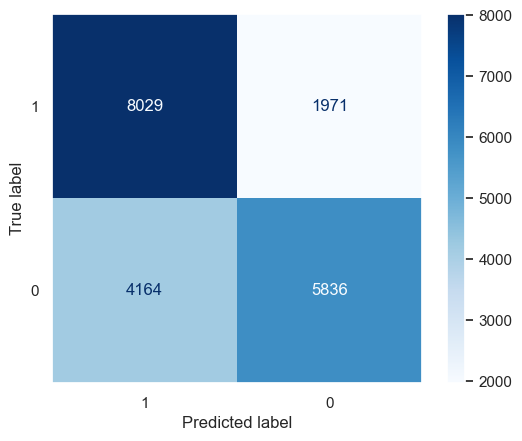

In [94]:
# Visualizando a matriz de confusão
desenhaMatrizConfusao(Yteste, previsoes, linearDiscriminantAnalysis)

In [95]:
# Atualizando o dataframe com o desempenho dos algoritmos
dfComparaAlgoritmo.iloc[1,1] = "%.2f" % (acuracia * 100) + "%"
dfComparaAlgoritmo.iloc[1,2] = numeroAcertos
dfComparaAlgoritmo.iloc[1,3] = numeroErros
dfComparaAlgoritmo.iloc[1,4] = "%.2f" % (precisao * 100) + "%"
dfComparaAlgoritmo.iloc[1,5] = "%.2f" % (recall * 100) + "%"
dfComparaAlgoritmo.iloc[1,6] = "%.2f" % (f1Score * 100) + "%"
dfComparaAlgoritmo.iloc[1,7] = "%.2f" % (roc * 100) + "%"
dfComparaAlgoritmo

,Algoritmo,Acurácia,Acertos,Erros,Precisao,Recall,F1 score,Curva ROC
0,Regressão Logística,74.61%,14922,5078,74.75%,74.61%,74.58%,82.56%
1,Linear Discriminant Analysis,69.33%,13865,6135,70.30%,69.32%,68.95%,71.07%
2,KNN,-,-,-,-,-,-,-
3,Naive Bayes,-,-,-,-,-,-,-
4,Árvore de Decisão,-,-,-,-,-,-,-
5,SVM,0,0,0,0,0,0,0
6,Random Forest,-,-,-,-,-,-,-
7,Bagging Classifier,-,-,-,-,-,-,-
8,AdaBoost,-,-,-,-,-,-,-
9,Voting Classifier,0,0,0,0,0,0,0


### 11.3 - K-Nearest Neighbors - KNN

In [96]:
# Pesquisando os melhores parâmetros com RandomizedSearchCV
# Cria um dicionário com os valores que serão testados como parâmetro
parametros = {
    "n_neighbors": [2, 3, 4, 5, 6, 7, 8, 9],
    "weights": ['uniform', 'distance'],
    "algorithm": ['ball_tree', 'kd_tree', 'brute']
}

# Cria o modelo que desejamos testar os melhores parâmetros
kNeighborsClassifier = KNeighborsClassifier()

# Cria o objeto do tipo RandomizedSearchCV
randomizedSearch = RandomizedSearchCV(estimator = kNeighborsClassifier, param_distributions = parametros, random_state = 11)

# Treinando os parâmetros. ATENÇÃO: Deve-se usar todo conjunto de dados.
randomizedSearch.fit(X, y)

# Salvando os melhores parâmetros em uma lista
melhoresParametros = []
for k in randomizedSearch.best_params_:
    melhoresParametros.append(randomizedSearch.best_params_[k])

# Print do resultado
print("Acurácia média: %.3f" % (randomizedSearch.best_score_ * 100) + "%")
print("Melhores parâmetros para o modelo:", randomizedSearch.best_params_)

Acurácia média: 76.161%
Melhores parâmetros para o modelo: {'weights': 'distance', 'n_neighbors': 6, 'algorithm': 'brute'}


In [97]:
# Criando o modelo
kNeighborsClassifier = KNeighborsClassifier(weights = melhoresParametros[0], n_neighbors = melhoresParametros[1], algorithm = melhoresParametros[2])

# Treinamento do modelo
kNeighborsClassifier.fit(dadosXtreino, Ytreino)

# Previsões com os dados de teste
previsoes = kNeighborsClassifier.predict(dadosXteste)

# Calculando a acurácia do modelo
numeroAcertos = accuracy_score(Yteste, previsoes, normalize=False)
numeroErros = len(Yteste)-numeroAcertos
acuracia = numeroAcertos/len(Yteste)

# Calculando acurácia
print("Acurácia: %.2f" % (acuracia * 100) + "%")
print("Número de acertos:", numeroAcertos)
print("Número de erros:", numeroErros)

# Calculando a precisão do modelo
# O parâmetro average='macro' calcula as métricas para cada classe e encontra sua média não ponderada.
precisao = precision_score(Yteste, previsoes, average='macro')
print("Precisão: %.2f" % (precisao * 100) + "%")

# Calculando o recall do modelo
# O parâmetro average='macro' calcula as métricas para cada classe e encontra sua média não ponderada.
recall = recall_score(Yteste, previsoes, average='macro')
print("Recall: %.2f" % (recall * 100) + "%")

# Calculando o f1 score do modelo
# O parâmetro average='macro' calcula as métricas para cada classe e encontra sua média não ponderada.
f1Score = f1_score(Yteste, previsoes, average='macro')
print("F1 score: %.2f" % (f1Score * 100) + "%")

# Calculando a área abaixo da curva.
# Observe que é necessário fazer as previsões novamente com o método predict_proba. Este método estima a probabilidade das classes.
roc = roc_auc_score(Yteste, kNeighborsClassifier.predict_proba(Xteste)[:, 1])
print("Curva ROC: %.2f" % (roc * 100) + "%")

Acurácia: 76.33%
Número de acertos: 15266
Número de erros: 4734
Precisão: 76.44%
Recall: 76.33%
F1 score: 76.30%
Curva ROC: 82.19%


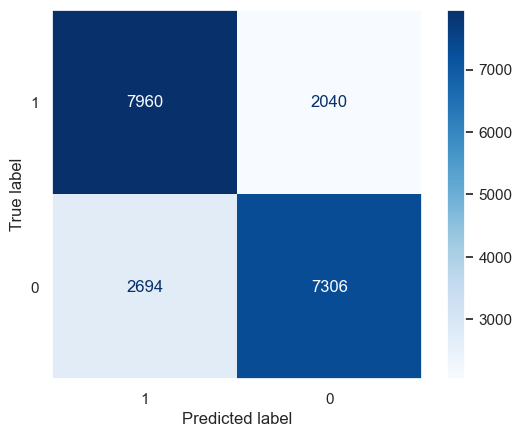

In [98]:
# Visualizando a matriz de confusão
desenhaMatrizConfusao(Yteste, previsoes, kNeighborsClassifier)

In [99]:
# Atualizando o dataframe com o desempenho dos algoritmos
dfComparaAlgoritmo.iloc[2,1] = "%.2f" % (acuracia * 100) + "%"
dfComparaAlgoritmo.iloc[2,2] = numeroAcertos
dfComparaAlgoritmo.iloc[2,3] = numeroErros
dfComparaAlgoritmo.iloc[2,4] = "%.2f" % (precisao * 100) + "%"
dfComparaAlgoritmo.iloc[2,5] = "%.2f" % (recall * 100) + "%"
dfComparaAlgoritmo.iloc[2,6] = "%.2f" % (f1Score * 100) + "%"
dfComparaAlgoritmo.iloc[2,7] = "%.2f" % (roc * 100) + "%"
dfComparaAlgoritmo

,Algoritmo,Acurácia,Acertos,Erros,Precisao,Recall,F1 score,Curva ROC
0,Regressão Logística,74.61%,14922,5078,74.75%,74.61%,74.58%,82.56%
1,Linear Discriminant Analysis,69.33%,13865,6135,70.30%,69.32%,68.95%,71.07%
2,KNN,76.33%,15266,4734,76.44%,76.33%,76.30%,82.19%
3,Naive Bayes,-,-,-,-,-,-,-
4,Árvore de Decisão,-,-,-,-,-,-,-
5,SVM,0,0,0,0,0,0,0
6,Random Forest,-,-,-,-,-,-,-
7,Bagging Classifier,-,-,-,-,-,-,-
8,AdaBoost,-,-,-,-,-,-,-
9,Voting Classifier,0,0,0,0,0,0,0


### 11.4 - Naive Bayes

In [100]:
# Criando o modelo
gaussianNB = GaussianNB()

# Treinamento do modelo
gaussianNB.fit(dadosXtreino, Ytreino)

# Previsões com os dados de teste
previsoes = gaussianNB.predict(dadosXteste)

# Calculando a acurácia do modelo
numeroAcertos = accuracy_score(Yteste, previsoes, normalize=False)
numeroErros = len(Yteste)-numeroAcertos
acuracia = numeroAcertos/len(Yteste)

# Calculando acurácia
print("Acurácia: %.2f" % (acuracia * 100) + "%")
print("Número de acertos:", numeroAcertos)
print("Número de erros:", numeroErros)

# Calculando a precisão do modelo
# O parâmetro average='macro' calcula as métricas para cada classe e encontra sua média não ponderada.
precisao = precision_score(Yteste, previsoes, average='macro')
print("Precisão: %.2f" % (precisao * 100) + "%")

# Calculando o recall do modelo
# O parâmetro average='macro' calcula as métricas para cada classe e encontra sua média não ponderada.
recall = recall_score(Yteste, previsoes, average='macro')
print("Recall: %.2f" % (recall * 100) + "%")

# Calculando o f1 score do modelo
# O parâmetro average='macro' calcula as métricas para cada classe e encontra sua média não ponderada.
f1Score = f1_score(Yteste, previsoes, average='macro')
print("F1 score: %.2f" % (f1Score * 100) + "%")

# Calculando a área abaixo da curva.
# Observe que é necessário fazer as previsões novamente com o método predict_proba. Este método estima a probabilidade das classes.
roc = roc_auc_score(Yteste, gaussianNB.predict_proba(Xteste)[:, 1])
print("Curva ROC: %.2f" % (roc * 100) + "%")

Acurácia: 74.98%
Número de acertos: 14997
Número de erros: 5003
Precisão: 77.12%
Recall: 74.98%
F1 score: 74.48%
Curva ROC: 81.37%


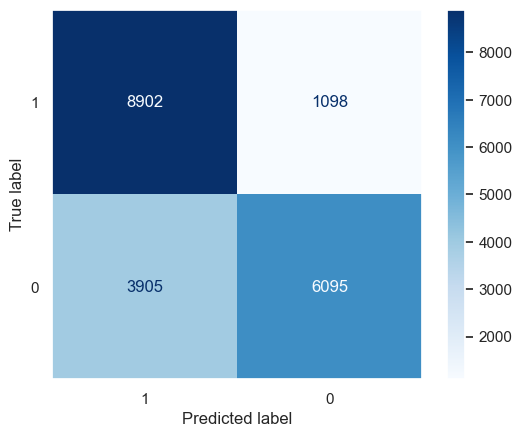

In [101]:
# Visualizando a matriz de confusão
desenhaMatrizConfusao(Yteste, previsoes, gaussianNB)

In [102]:
# Atualizando o dataframe com o desempenho dos algoritmos
dfComparaAlgoritmo.iloc[3,1] = "%.2f" % (acuracia * 100) + "%"
dfComparaAlgoritmo.iloc[3,2] = numeroAcertos
dfComparaAlgoritmo.iloc[3,3] = numeroErros
dfComparaAlgoritmo.iloc[3,4] = "%.2f" % (precisao * 100) + "%"
dfComparaAlgoritmo.iloc[3,5] = "%.2f" % (recall * 100) + "%"
dfComparaAlgoritmo.iloc[3,6] = "%.2f" % (f1Score * 100) + "%"
dfComparaAlgoritmo.iloc[3,7] = "%.2f" % (roc * 100) + "%"
dfComparaAlgoritmo

,Algoritmo,Acurácia,Acertos,Erros,Precisao,Recall,F1 score,Curva ROC
0,Regressão Logística,74.61%,14922,5078,74.75%,74.61%,74.58%,82.56%
1,Linear Discriminant Analysis,69.33%,13865,6135,70.30%,69.32%,68.95%,71.07%
2,KNN,76.33%,15266,4734,76.44%,76.33%,76.30%,82.19%
3,Naive Bayes,74.98%,14997,5003,77.12%,74.98%,74.48%,81.37%
4,Árvore de Decisão,-,-,-,-,-,-,-
5,SVM,0,0,0,0,0,0,0
6,Random Forest,-,-,-,-,-,-,-
7,Bagging Classifier,-,-,-,-,-,-,-
8,AdaBoost,-,-,-,-,-,-,-
9,Voting Classifier,0,0,0,0,0,0,0


### 11.5 - Árvores de Decisão

In [103]:
# Pesquisando os melhores parâmetros com RandomizedSearchCV
# Cria um dicionário com os valores que serão testados como parâmetro
parametros = {
    "min_samples_split": [2, 3, 4, 5, 6],
    "max_depth": [100, 150, 200, 350, 400, 550],
    "criterion": ['gini', 'log_loss', 'entropia'],
    "splitter": ["best", "random"]
}

# Cria o modelo que desejamos testar os melhores parâmetros
decisionTreeClassifier = DecisionTreeClassifier(random_state=81)

# Cria o objeto do tipo RandomizedSearchCV
randomizedSearch = RandomizedSearchCV(estimator = decisionTreeClassifier, param_distributions = parametros, random_state = 11)

# Treinando os parâmetros. ATENÇÃO: Deve-se usar todo conjunto de dados.
randomizedSearch.fit(X, y)

# Salvando os melhores parâmetros em uma lista
melhoresParametrosAR = []
for k in randomizedSearch.best_params_:
    melhoresParametrosAR.append(randomizedSearch.best_params_[k])

# Print do resultado
print("Acurácia média: %.3f" % (randomizedSearch.best_score_ * 100) + "%")
print("Melhores parâmetros para o modelo:", randomizedSearch.best_params_)

Acurácia média: 89.064%
Melhores parâmetros para o modelo: {'splitter': 'random', 'min_samples_split': 6, 'max_depth': 550, 'criterion': 'log_loss'}


In [104]:
# Criando o modelo
decisionTreeClassifier = DecisionTreeClassifier(splitter = melhoresParametrosAR[0], 
                                     min_samples_split = melhoresParametrosAR[1],
                                     max_depth = melhoresParametrosAR[2],
                                     criterion = melhoresParametrosAR[3],
                                     random_state=50)

# Treinamento do modelo
decisionTreeClassifier.fit(dadosXtreino, Ytreino)

# Previsões com os dados de teste
previsoes = decisionTreeClassifier.predict(dadosXteste)

# Calculando a acurácia do modelo
numeroAcertos = accuracy_score(Yteste, previsoes, normalize=False)
numeroErros = len(Yteste)-numeroAcertos
acuracia = numeroAcertos/len(Yteste)

# Calculando acurácia
print("Acurácia: %.2f" % (acuracia * 100) + "%")
print("Número de acertos:", numeroAcertos)
print("Número de erros:", numeroErros)

# Calculando a precisão do modelo
# O parâmetro average='macro' calcula as métricas para cada classe e encontra sua média não ponderada.
precisao = precision_score(Yteste, previsoes, average='macro')
print("Precisão: %.2f" % (precisao * 100) + "%")

# Calculando o recall do modelo
# O parâmetro average='macro' calcula as métricas para cada classe e encontra sua média não ponderada.
recall = recall_score(Yteste, previsoes, average='macro')
print("Recall: %.2f" % (recall * 100) + "%")

# Calculando o f1 score do modelo
# O parâmetro average='macro' calcula as métricas para cada classe e encontra sua média não ponderada.
f1Score = f1_score(Yteste, previsoes, average='macro')
print("F1 score: %.2f" % (f1Score * 100) + "%")

# Calculando a área abaixo da curva.
# Observe que é necessário fazer as previsões novamente com o método predict_proba. Este método estima a probabilidade das classes.
roc = roc_auc_score(Yteste, decisionTreeClassifier.predict_proba(Xteste)[:, 1])
print("Curva ROC: %.2f" % (roc * 100) + "%")

Acurácia: 88.51%
Número de acertos: 17702
Número de erros: 2298
Precisão: 88.56%
Recall: 88.51%
F1 score: 88.51%
Curva ROC: 91.44%


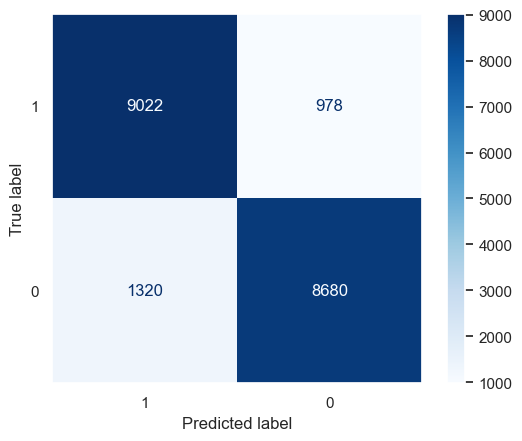

In [105]:
# Visualizando a matriz de confusão
desenhaMatrizConfusao(Yteste, previsoes, decisionTreeClassifier)

In [106]:
# Atualizando o dataframe com o desempenho dos algoritmos
dfComparaAlgoritmo.iloc[4,1] = "%.2f" % (acuracia * 100) + "%"
dfComparaAlgoritmo.iloc[4,2] = numeroAcertos
dfComparaAlgoritmo.iloc[4,3] = numeroErros
dfComparaAlgoritmo.iloc[4,4] = "%.2f" % (precisao * 100) + "%"
dfComparaAlgoritmo.iloc[4,5] = "%.2f" % (recall * 100) + "%"
dfComparaAlgoritmo.iloc[4,6] = "%.2f" % (f1Score * 100) + "%"
dfComparaAlgoritmo.iloc[4,7] = "%.2f" % (roc * 100) + "%"
dfComparaAlgoritmo

,Algoritmo,Acurácia,Acertos,Erros,Precisao,Recall,F1 score,Curva ROC
0,Regressão Logística,74.61%,14922,5078,74.75%,74.61%,74.58%,82.56%
1,Linear Discriminant Analysis,69.33%,13865,6135,70.30%,69.32%,68.95%,71.07%
2,KNN,76.33%,15266,4734,76.44%,76.33%,76.30%,82.19%
3,Naive Bayes,74.98%,14997,5003,77.12%,74.98%,74.48%,81.37%
4,Árvore de Decisão,88.51%,17702,2298,88.56%,88.51%,88.51%,91.44%
5,SVM,0,0,0,0,0,0,0
6,Random Forest,-,-,-,-,-,-,-
7,Bagging Classifier,-,-,-,-,-,-,-
8,AdaBoost,-,-,-,-,-,-,-
9,Voting Classifier,0,0,0,0,0,0,0


### 11.6 - Support Vector Machines - SVM

In [107]:
'''
# Criando o modelo
svc = SVC(probability=True) 

# Treinamento do modelo
svc.fit(dadosXtreino, Ytreino)

# Previsões com os dados de teste
previsoes = svc.predict(dadosXteste)

# Calculando a acurácia do modelo
numeroAcertos = accuracy_score(Yteste, previsoes, normalize=False)
numeroErros = len(Yteste)-numeroAcertos
acuracia = numeroAcertos/len(Yteste)

# Calculando acurácia
print("Acurácia: %.2f" % (acuracia * 100) + "%")
print("Número de acertos:", numeroAcertos)
print("Número de erros:", numeroErros)

# Calculando a precisão do modelo
# O parâmetro average='macro' calcula as métricas para cada classe e encontra sua média não ponderada.
precisao = precision_score(Yteste, previsoes, average='macro')
print("Precisão: %.2f" % (precisao * 100) + "%")

# Calculando o recall do modelo
# O parâmetro average='macro' calcula as métricas para cada classe e encontra sua média não ponderada.
recall = recall_score(Yteste, previsoes, average='macro')
print("Recall: %.2f" % (recall * 100) + "%")

# Calculando o f1 score do modelo
# O parâmetro average='macro' calcula as métricas para cada classe e encontra sua média não ponderada.
f1Score = f1_score(Yteste, previsoes, average='macro')
print("F1 score: %.2f" % (f1Score * 100) + "%")

# Calculando a área abaixo da curva.
# Observe que é necessário fazer as previsões novamente com o método predict_proba. Este método estima a probabilidade das classes.
roc = roc_auc_score(Yteste, svc.predict_proba(Xteste)[:, 1])
print("Curva ROC: %.2f" % (roc * 100) + "%")
'''

'\n# Criando o modelo\nsvc = SVC(probability=True) \n\n# Treinamento do modelo\nsvc.fit(dadosXtreino, Ytreino)\n\n# Previsões com os dados de teste\nprevisoes = svc.predict(dadosXteste)\n\n# Calculando a acurácia do modelo\nnumeroAcertos = accuracy_score(Yteste, previsoes, normalize=False)\nnumeroErros = len(Yteste)-numeroAcertos\nacuracia = numeroAcertos/len(Yteste)\n\n# Calculando acurácia\nprint("Acurácia: %.2f" % (acuracia * 100) + "%")\nprint("Número de acertos:", numeroAcertos)\nprint("Número de erros:", numeroErros)\n\n# Calculando a precisão do modelo\n# O parâmetro average=\'macro\' calcula as métricas para cada classe e encontra sua média não ponderada.\nprecisao = precision_score(Yteste, previsoes, average=\'macro\')\nprint("Precisão: %.2f" % (precisao * 100) + "%")\n\n# Calculando o recall do modelo\n# O parâmetro average=\'macro\' calcula as métricas para cada classe e encontra sua média não ponderada.\nrecall = recall_score(Yteste, previsoes, average=\'macro\')\nprint("Re

In [108]:
# Visualizando a matriz de confusão
# desenhaMatrizConfusao(Yteste, previsoes, svc)

In [109]:
'''
# Atualizando o dataframe com o desempenho dos algoritmos
dfComparaAlgoritmo.iloc[5,1] = "%.2f" % (acuracia * 100) + "%"
dfComparaAlgoritmo.iloc[5,2] = numeroAcertos
dfComparaAlgoritmo.iloc[5,3] = numeroErros
dfComparaAlgoritmo.iloc[5,4] = "%.2f" % (precisao * 100) + "%"
dfComparaAlgoritmo.iloc[5,5] = "%.2f" % (recall * 100) + "%"
dfComparaAlgoritmo.iloc[5,6] = "%.2f" % (f1Score * 100) + "%"
dfComparaAlgoritmo.iloc[5,7] = "%.2f" % (roc * 100) + "%"
dfComparaAlgoritmo
'''

'\n# Atualizando o dataframe com o desempenho dos algoritmos\ndfComparaAlgoritmo.iloc[5,1] = "%.2f" % (acuracia * 100) + "%"\ndfComparaAlgoritmo.iloc[5,2] = numeroAcertos\ndfComparaAlgoritmo.iloc[5,3] = numeroErros\ndfComparaAlgoritmo.iloc[5,4] = "%.2f" % (precisao * 100) + "%"\ndfComparaAlgoritmo.iloc[5,5] = "%.2f" % (recall * 100) + "%"\ndfComparaAlgoritmo.iloc[5,6] = "%.2f" % (f1Score * 100) + "%"\ndfComparaAlgoritmo.iloc[5,7] = "%.2f" % (roc * 100) + "%"\ndfComparaAlgoritmo\n'

### 11.7 - Random Forest

In [110]:
# Pesquisando os melhores parâmetros com RandomizedSearchCV
# Cria um dicionário com os valores que serão testados como parâmetro
parametros = {
    "n_estimators": [100, 106, 108, 110],
    "criterion": ['gini', 'log_loss', 'entropia'], 
    "max_depth": [None, 2, 5, 6, 7],
    "min_samples_split": [6, 7, 8],
    "max_features": ['auto', 'sqrt', 'log2'],
    "min_samples_leaf": [5, 6, 7]
}

# Cria o modelo que desejamos testar os melhores parâmetros
randomForestClassifier = RandomForestClassifier(random_state=81)

# Cria o objeto do tipo RandomizedSearchCV
randomizedSearch = RandomizedSearchCV(estimator = randomForestClassifier, param_distributions = parametros, random_state = 11)

# Treinando os parâmetros. ATENÇÃO: Deve-se usar todo conjunto de dados.
randomizedSearch.fit(X, y)

# Salvando os melhores parâmetros em uma lista
melhoresParametros = []
for k in randomizedSearch.best_params_:
    melhoresParametros.append(randomizedSearch.best_params_[k])

# Print do resultado
print("Acurácia média: %.3f" % (randomizedSearch.best_score_ * 100) + "%")
print("Melhores parâmetros para o modelo:", randomizedSearch.best_params_)

Acurácia média: 91.822%
Melhores parâmetros para o modelo: {'n_estimators': 110, 'min_samples_split': 7, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_depth': None, 'criterion': 'log_loss'}


In [111]:
# Criando o modelo
randomForestClassifier = RandomForestClassifier(n_estimators = melhoresParametros[0], 
                                                min_samples_split = melhoresParametros[1],
                                                min_samples_leaf = melhoresParametros[2],
                                                max_features = melhoresParametros[3],          
                                                max_depth = melhoresParametros[4],
                                                criterion = melhoresParametros[5],
                                                random_state=92)

# Treinamento do modelo
randomForestClassifier.fit(dadosXtreino, Ytreino)

# Previsões com os dados de teste
previsoes = randomForestClassifier.predict(dadosXteste)

# Calculando a acurácia do modelo
numeroAcertos = accuracy_score(Yteste, previsoes, normalize=False)
numeroErros = len(Yteste)-numeroAcertos
acuracia = numeroAcertos/len(Yteste)

# Calculando acurácia
print("Acurácia: %.2f" % (acuracia * 100) + "%")
print("Número de acertos:", numeroAcertos)
print("Número de erros:", numeroErros)

# Calculando a precisão do modelo
# O parâmetro average='macro' calcula as métricas para cada classe e encontra sua média não ponderada.
precisao = precision_score(Yteste, previsoes, average='macro')
print("Precisão: %.2f" % (precisao * 100) + "%")

# Calculando o recall do modelo
# O parâmetro average='macro' calcula as métricas para cada classe e encontra sua média não ponderada.
recall = recall_score(Yteste, previsoes, average='macro')
print("Recall: %.2f" % (recall * 100) + "%")

# Calculando o f1 score do modelo
# O parâmetro average='macro' calcula as métricas para cada classe e encontra sua média não ponderada.
f1Score = f1_score(Yteste, previsoes, average='macro')
print("F1 score: %.2f" % (f1Score * 100) + "%")

# Calculando a área abaixo da curva.
# Observe que é necessário fazer as previsões novamente com o método predict_proba. Este método estima a probabilidade das classes.
roc = roc_auc_score(Yteste, randomForestClassifier.predict_proba(Xteste)[:, 1])
print("Curva ROC: %.2f" % (roc * 100) + "%")

Acurácia: 91.84%
Número de acertos: 18369
Número de erros: 1631
Precisão: 92.18%
Recall: 91.84%
F1 score: 91.83%
Curva ROC: 96.52%


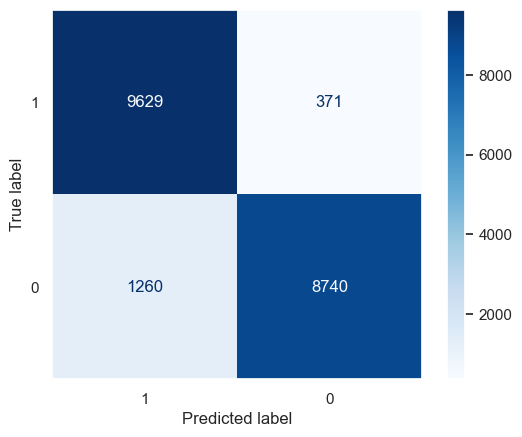

In [112]:
# Visualizando a matriz de confusão
desenhaMatrizConfusao(Yteste, previsoes, randomForestClassifier)

In [113]:
# Atualizando o dataframe com o desempenho dos algoritmos
dfComparaAlgoritmo.iloc[6,1] = "%.2f" % (acuracia * 100) + "%"
dfComparaAlgoritmo.iloc[6,2] = numeroAcertos
dfComparaAlgoritmo.iloc[6,3] = numeroErros
dfComparaAlgoritmo.iloc[6,4] = "%.2f" % (precisao * 100) + "%"
dfComparaAlgoritmo.iloc[6,5] = "%.2f" % (recall * 100) + "%"
dfComparaAlgoritmo.iloc[6,6] = "%.2f" % (f1Score * 100) + "%"
dfComparaAlgoritmo.iloc[6,7] = "%.2f" % (roc * 100) + "%"
dfComparaAlgoritmo

,Algoritmo,Acurácia,Acertos,Erros,Precisao,Recall,F1 score,Curva ROC
0,Regressão Logística,74.61%,14922,5078,74.75%,74.61%,74.58%,82.56%
1,Linear Discriminant Analysis,69.33%,13865,6135,70.30%,69.32%,68.95%,71.07%
2,KNN,76.33%,15266,4734,76.44%,76.33%,76.30%,82.19%
3,Naive Bayes,74.98%,14997,5003,77.12%,74.98%,74.48%,81.37%
4,Árvore de Decisão,88.51%,17702,2298,88.56%,88.51%,88.51%,91.44%
5,SVM,0,0,0,0,0,0,0
6,Random Forest,91.84%,18369,1631,92.18%,91.84%,91.83%,96.52%
7,Bagging Classifier,-,-,-,-,-,-,-
8,AdaBoost,-,-,-,-,-,-,-
9,Voting Classifier,0,0,0,0,0,0,0


### 11.8 - Bagging Classifier

In [114]:
# Cria o modelo de árvore de decisão
decisionTreeClassifierBC = DecisionTreeClassifier(splitter = melhoresParametrosAR[0], 
                                     min_samples_split = melhoresParametrosAR[1],
                                     max_depth = melhoresParametrosAR[2],
                                     criterion = melhoresParametrosAR[3],
                                     random_state=50)

# Criando o modelo Bagging Classifier
baggingClassifier = BaggingClassifier(base_estimator = decisionTreeClassifierBC, random_state = 1)

# Treinamento do modelo
baggingClassifier.fit(dadosXtreino, Ytreino)

# Previsões com os dados de teste
previsoes = baggingClassifier.predict(dadosXteste)

# Calculando a acurácia do modelo
numeroAcertos = accuracy_score(Yteste, previsoes, normalize=False)
numeroErros = len(Yteste)-numeroAcertos
acuracia = numeroAcertos/len(Yteste)

# Calculando acurácia
print("Acurácia: %.2f" % (acuracia * 100) + "%")
print("Número de acertos:", numeroAcertos)
print("Número de erros:", numeroErros)

# Calculando a precisão do modelo
# O parâmetro average='macro' calcula as métricas para cada classe e encontra sua média não ponderada.
precisao = precision_score(Yteste, previsoes, average='macro')
print("Precisão: %.2f" % (precisao * 100) + "%")

# Calculando o recall do modelo
# O parâmetro average='macro' calcula as métricas para cada classe e encontra sua média não ponderada.
recall = recall_score(Yteste, previsoes, average='macro')
print("Recall: %.2f" % (recall * 100) + "%")

# Calculando o f1 score do modelo
# O parâmetro average='macro' calcula as métricas para cada classe e encontra sua média não ponderada.
f1Score = f1_score(Yteste, previsoes, average='macro')
print("F1 score: %.2f" % (f1Score * 100) + "%")

# Calculando a área abaixo da curva.
# Observe que é necessário fazer as previsões novamente com o método predict_proba. Este método estima a probabilidade das classes.
roc = roc_auc_score(Yteste, baggingClassifier.predict_proba(Xteste)[:, 1])
print("Curva ROC: %.2f" % (roc * 100) + "%")

Acurácia: 91.11%
Número de acertos: 18222
Número de erros: 1778
Precisão: 91.28%
Recall: 91.11%
F1 score: 91.10%
Curva ROC: 95.68%


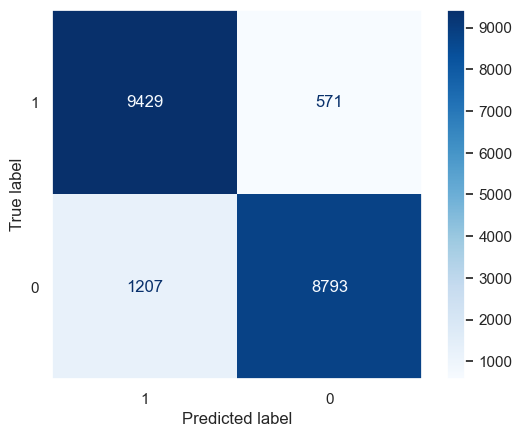

In [115]:
# Visualizando a matriz de confusão
desenhaMatrizConfusao(Yteste, previsoes, baggingClassifier)

In [116]:
# Atualizando o dataframe com o desempenho dos algoritmos
dfComparaAlgoritmo.iloc[7,1] = "%.2f" % (acuracia * 100) + "%"
dfComparaAlgoritmo.iloc[7,2] = numeroAcertos
dfComparaAlgoritmo.iloc[7,3] = numeroErros
dfComparaAlgoritmo.iloc[7,4] = "%.2f" % (precisao * 100) + "%"
dfComparaAlgoritmo.iloc[7,5] = "%.2f" % (recall * 100) + "%"
dfComparaAlgoritmo.iloc[7,6] = "%.2f" % (f1Score * 100) + "%"
dfComparaAlgoritmo.iloc[7,7] = "%.2f" % (roc * 100) + "%"
dfComparaAlgoritmo

,Algoritmo,Acurácia,Acertos,Erros,Precisao,Recall,F1 score,Curva ROC
0,Regressão Logística,74.61%,14922,5078,74.75%,74.61%,74.58%,82.56%
1,Linear Discriminant Analysis,69.33%,13865,6135,70.30%,69.32%,68.95%,71.07%
2,KNN,76.33%,15266,4734,76.44%,76.33%,76.30%,82.19%
3,Naive Bayes,74.98%,14997,5003,77.12%,74.98%,74.48%,81.37%
4,Árvore de Decisão,88.51%,17702,2298,88.56%,88.51%,88.51%,91.44%
5,SVM,0,0,0,0,0,0,0
6,Random Forest,91.84%,18369,1631,92.18%,91.84%,91.83%,96.52%
7,Bagging Classifier,91.11%,18222,1778,91.28%,91.11%,91.10%,95.68%
8,AdaBoost,-,-,-,-,-,-,-
9,Voting Classifier,0,0,0,0,0,0,0


### 11.9 - AdaBoost

In [117]:
# Criando o modelo
adaBoostClassifier = AdaBoostClassifier()

# Treinamento do modelo
adaBoostClassifier.fit(dadosXtreino, Ytreino)

# Previsões com os dados de teste
previsoes = adaBoostClassifier.predict(dadosXteste)

# Calculando a acurácia do modelo
numeroAcertos = accuracy_score(Yteste, previsoes, normalize=False)
numeroErros = len(Yteste)-numeroAcertos
acuracia = numeroAcertos/len(Yteste)

# Calculando acurácia
print("Acurácia: %.2f" % (acuracia * 100) + "%")
print("Número de acertos:", numeroAcertos)
print("Número de erros:", numeroErros)

# Calculando a precisão do modelo
# O parâmetro average='macro' calcula as métricas para cada classe e encontra sua média não ponderada.
precisao = precision_score(Yteste, previsoes, average='macro')
print("Precisão: %.2f" % (precisao * 100) + "%")

# Calculando o recall do modelo
# O parâmetro average='macro' calcula as métricas para cada classe e encontra sua média não ponderada.
recall = recall_score(Yteste, previsoes, average='macro')
print("Recall: %.2f" % (recall * 100) + "%")

# Calculando o f1 score do modelo
# O parâmetro average='macro' calcula as métricas para cada classe e encontra sua média não ponderada.
f1Score = f1_score(Yteste, previsoes, average='macro')
print("F1 score: %.2f" % (f1Score * 100) + "%")

# Calculando a área abaixo da curva.
# Observe que é necessário fazer as previsões novamente com o método predict_proba. Este método estima a probabilidade das classes.
roc = roc_auc_score(Yteste, adaBoostClassifier.predict_proba(Xteste)[:, 1])
print("Curva ROC: %.2f" % (roc * 100) + "%")

Acurácia: 89.42%
Número de acertos: 17884
Número de erros: 2116
Precisão: 89.75%
Recall: 89.42%
F1 score: 89.40%
Curva ROC: 95.13%


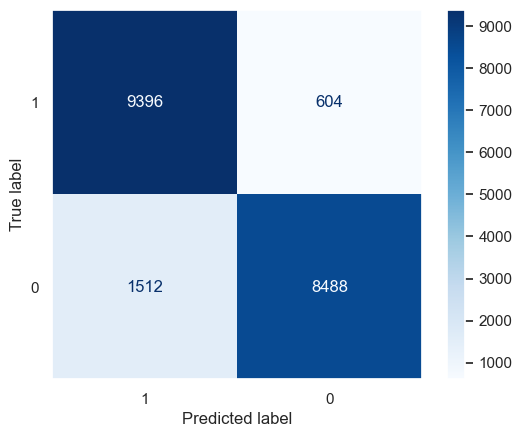

In [118]:
# Visualizando a matriz de confusão
desenhaMatrizConfusao(Yteste, previsoes, adaBoostClassifier)

In [119]:
# Atualizando o dataframe com o desempenho dos algoritmos
dfComparaAlgoritmo.iloc[8,1] = "%.2f" % (acuracia * 100) + "%"
dfComparaAlgoritmo.iloc[8,2] = numeroAcertos
dfComparaAlgoritmo.iloc[8,3] = numeroErros
dfComparaAlgoritmo.iloc[8,4] = "%.2f" % (precisao * 100) + "%"
dfComparaAlgoritmo.iloc[8,5] = "%.2f" % (recall * 100) + "%"
dfComparaAlgoritmo.iloc[8,6] = "%.2f" % (f1Score * 100) + "%"
dfComparaAlgoritmo.iloc[8,7] = "%.2f" % (roc * 100) + "%"
dfComparaAlgoritmo

,Algoritmo,Acurácia,Acertos,Erros,Precisao,Recall,F1 score,Curva ROC
0,Regressão Logística,74.61%,14922,5078,74.75%,74.61%,74.58%,82.56%
1,Linear Discriminant Analysis,69.33%,13865,6135,70.30%,69.32%,68.95%,71.07%
2,KNN,76.33%,15266,4734,76.44%,76.33%,76.30%,82.19%
3,Naive Bayes,74.98%,14997,5003,77.12%,74.98%,74.48%,81.37%
4,Árvore de Decisão,88.51%,17702,2298,88.56%,88.51%,88.51%,91.44%
5,SVM,0,0,0,0,0,0,0
6,Random Forest,91.84%,18369,1631,92.18%,91.84%,91.83%,96.52%
7,Bagging Classifier,91.11%,18222,1778,91.28%,91.11%,91.10%,95.68%
8,AdaBoost,89.42%,17884,2116,89.75%,89.42%,89.40%,95.13%
9,Voting Classifier,0,0,0,0,0,0,0


### 11.10 - Gradient Tree Boosting

In [120]:
# Pesquisando os melhores parâmetros com RandomizedSearchCV
# Cria um dicionário com os valores que serão testados como parâmetro
parametros = {
   "n_estimators": [100, 110, 150],
   "learning_rate": [0.1, 0.5, 1.0, 1.5],
}

# Cria o modelo que desejamos testar os melhores parâmetros
gradientBoostingClassifier = GradientBoostingClassifier()

# Cria o objeto do tipo RandomizedSearchCV
randomizedSearch = RandomizedSearchCV(estimator = gradientBoostingClassifier, param_distributions = parametros, random_state = 11)

# Treinando os parâmetros. ATENÇÃO: Deve-se usar todo conjunto de dados.
randomizedSearch.fit(X, y)

# Salvando os melhores parâmetros em uma lista
melhoresParametros = []
for k in randomizedSearch.best_params_:
    melhoresParametros.append(randomizedSearch.best_params_[k])

# Print do resultado
print("Acurácia média: %.3f" % (randomizedSearch.best_score_ * 100) + "%")
print("Melhores parâmetros para o modelo:", randomizedSearch.best_params_)

Acurácia média: 91.937%
Melhores parâmetros para o modelo: {'n_estimators': 150, 'learning_rate': 0.5}


In [121]:
# Criando o modelo
gradientBoostingClassifier = GradientBoostingClassifier(
                                   )

# Treinamento do modelo
gradientBoostingClassifier.fit(dadosXtreino, Ytreino)

# Previsões com os dados de teste
previsoes = gradientBoostingClassifier.predict(dadosXteste)

# Calculando a acurácia do modelo
numeroAcertos = accuracy_score(Yteste, previsoes, normalize=False)
numeroErros = len(Yteste)-numeroAcertos
acuracia = numeroAcertos/len(Yteste)

# Calculando acurácia
print("Acurácia: %.2f" % (acuracia * 100) + "%")
print("Número de acertos:", numeroAcertos)
print("Número de erros:", numeroErros)

# Calculando a precisão do modelo
# O parâmetro average='macro' calcula as métricas para cada classe e encontra sua média não ponderada.
precisao = precision_score(Yteste, previsoes, average='macro')
print("Precisão: %.2f" % (precisao * 100) + "%")

# Calculando o recall do modelo
# O parâmetro average='macro' calcula as métricas para cada classe e encontra sua média não ponderada.
recall = recall_score(Yteste, previsoes, average='macro')
print("Recall: %.2f" % (recall * 100) + "%")

# Calculando o f1 score do modelo
# O parâmetro average='macro' calcula as métricas para cada classe e encontra sua média não ponderada.
f1Score = f1_score(Yteste, previsoes, average='macro')
print("F1 score: %.2f" % (f1Score * 100) + "%")

# Calculando a área abaixo da curva.
# Observe que é necessário fazer as previsões novamente com o método predict_proba. Este método estima a probabilidade das classes.
roc = roc_auc_score(Yteste, gradientBoostingClassifier.predict_proba(Xteste)[:, 1])
print("Curva ROC: %.2f" % (roc * 100) + "%")

Acurácia: 90.94%
Número de acertos: 18188
Número de erros: 1812
Precisão: 91.53%
Recall: 90.94%
F1 score: 90.91%
Curva ROC: 96.13%


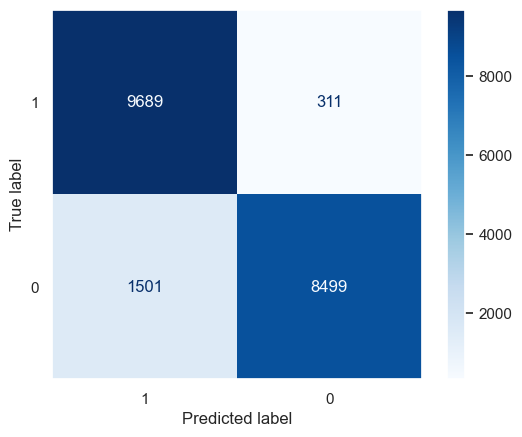

In [122]:
# Visualizando a matriz de confusão
desenhaMatrizConfusao(Yteste, previsoes, gradientBoostingClassifier)

In [123]:
# Atualizando o dataframe com o desempenho dos algoritmos
dfComparaAlgoritmo.iloc[10,1] = "%.2f" % (acuracia * 100) + "%"
dfComparaAlgoritmo.iloc[10,2] = numeroAcertos
dfComparaAlgoritmo.iloc[10,3] = numeroErros
dfComparaAlgoritmo.iloc[10,4] = "%.2f" % (precisao * 100) + "%"
dfComparaAlgoritmo.iloc[10,5] = "%.2f" % (recall * 100) + "%"
dfComparaAlgoritmo.iloc[10,6] = "%.2f" % (f1Score * 100) + "%"
dfComparaAlgoritmo.iloc[10,7] = "%.2f" % (roc * 100) + "%"
dfComparaAlgoritmo

,Algoritmo,Acurácia,Acertos,Erros,Precisao,Recall,F1 score,Curva ROC
0,Regressão Logística,74.61%,14922,5078,74.75%,74.61%,74.58%,82.56%
1,Linear Discriminant Analysis,69.33%,13865,6135,70.30%,69.32%,68.95%,71.07%
2,KNN,76.33%,15266,4734,76.44%,76.33%,76.30%,82.19%
3,Naive Bayes,74.98%,14997,5003,77.12%,74.98%,74.48%,81.37%
4,Árvore de Decisão,88.51%,17702,2298,88.56%,88.51%,88.51%,91.44%
5,SVM,0,0,0,0,0,0,0
6,Random Forest,91.84%,18369,1631,92.18%,91.84%,91.83%,96.52%
7,Bagging Classifier,91.11%,18222,1778,91.28%,91.11%,91.10%,95.68%
8,AdaBoost,89.42%,17884,2116,89.75%,89.42%,89.40%,95.13%
9,Voting Classifier,0,0,0,0,0,0,0


### 11.11 - XGBoost

In [124]:
# XGBooster exige que a variável alvo inicie com o valor zero, caso contrário ocorrerá erro

# Verificando se existe algum valor igual a zero na variável alvo 
if len(Ytreino[Ytreino == 0]) == 0:
    
    # Cria o objeto encoder
    encoder = LabelEncoder()

    # Cria uma nova coluna com a variável alvo com valores numéricos
    Ytreino = encoder.fit_transform(Ytreino)
    Yteste = encoder.fit_transform(Yteste)

    print("Foi realizado o enconder em Ytreino e Yteste para utilizar o XGBooster")
else:
    print("NÃO foi necessário realizar o encoder para utilizar o XGBooster")

Foi realizado o enconder em Ytreino e Yteste para utilizar o XGBooster


In [125]:
# Criando o modelo
xgb = XGBClassifier(booster='gbtree', 
                    colsample_bynode= 0.8,
                    learning_rate= 0.2, 
                    max_depth= 8,
                    num_parallel_tree= 15, 
                    subsample= 0.8,
                    tree_method= 'gpu_hist',
                    #nthread=16
                   )

# Criar o modelo com o código abaixo, caso o computador não tenha placa de vídeo dedicada com suporte a CUDA
# xgb = XGBClassifier()

# Treinamento do modelo
xgb.fit(dadosXtreino, Ytreino)

# Previsões com os dados de teste
previsoes = xgb.predict(dadosXteste)

# Calculando a acurácia do modelo
numeroAcertos = accuracy_score(Yteste, previsoes, normalize=False)
numeroErros = len(Yteste)-numeroAcertos
acuracia = numeroAcertos/len(Yteste)

# Calculando acurácia
print("Acurácia: %.2f" % (acuracia * 100) + "%")
print("Número de acertos:", numeroAcertos)
print("Número de erros:", numeroErros)

# Calculando a precisão do modelo
# O parâmetro average='macro' calcula as métricas para cada classe e encontra sua média não ponderada.
precisao = precision_score(Yteste, previsoes, average='macro')
print("Precisão: %.2f" % (precisao * 100) + "%")

# Calculando o recall do modelo
# O parâmetro average='macro' calcula as métricas para cada classe e encontra sua média não ponderada.
recall = recall_score(Yteste, previsoes, average='macro')
print("Recall: %.2f" % (recall * 100) + "%")

# Calculando o f1 score do modelo
# O parâmetro average='macro' calcula as métricas para cada classe e encontra sua média não ponderada.
f1Score = f1_score(Yteste, previsoes, average='macro')
print("F1 score: %.2f" % (f1Score * 100) + "%")

# Calculando a área abaixo da curva.
# Observe que é necessário fazer as previsões novamente com o método predict_proba. Este método estima a probabilidade das classes.
roc = roc_auc_score(Yteste, xgb.predict_proba(Xteste)[:, 1])
print("Curva ROC: %.2f" % (roc * 100) + "%")

Acurácia: 92.20%
Número de acertos: 18440
Número de erros: 1560
Precisão: 92.45%
Recall: 92.20%
F1 score: 92.19%
Curva ROC: 96.94%


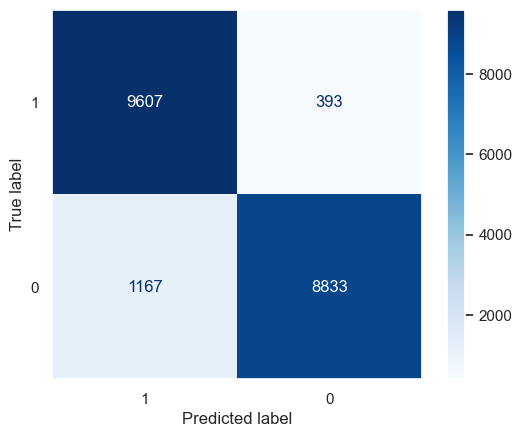

In [126]:
# Visualizando a matriz de confusão
desenhaMatrizConfusao(Yteste, previsoes, xgb)

In [127]:
# Atualizando o dataframe com o desempenho dos algoritmos
dfComparaAlgoritmo.iloc[11,1] = "%.2f" % (acuracia * 100) + "%"
dfComparaAlgoritmo.iloc[11,2] = numeroAcertos
dfComparaAlgoritmo.iloc[11,3] = numeroErros
dfComparaAlgoritmo.iloc[11,4] = "%.2f" % (precisao * 100) + "%"
dfComparaAlgoritmo.iloc[11,5] = "%.2f" % (recall * 100) + "%"
dfComparaAlgoritmo.iloc[11,6] = "%.2f" % (f1Score * 100) + "%"
dfComparaAlgoritmo.iloc[11,7] = "%.2f" % (roc * 100) + "%"
dfComparaAlgoritmo

,Algoritmo,Acurácia,Acertos,Erros,Precisao,Recall,F1 score,Curva ROC
0,Regressão Logística,74.61%,14922,5078,74.75%,74.61%,74.58%,82.56%
1,Linear Discriminant Analysis,69.33%,13865,6135,70.30%,69.32%,68.95%,71.07%
2,KNN,76.33%,15266,4734,76.44%,76.33%,76.30%,82.19%
3,Naive Bayes,74.98%,14997,5003,77.12%,74.98%,74.48%,81.37%
4,Árvore de Decisão,88.51%,17702,2298,88.56%,88.51%,88.51%,91.44%
5,SVM,0,0,0,0,0,0,0
6,Random Forest,91.84%,18369,1631,92.18%,91.84%,91.83%,96.52%
7,Bagging Classifier,91.11%,18222,1778,91.28%,91.11%,91.10%,95.68%
8,AdaBoost,89.42%,17884,2116,89.75%,89.42%,89.40%,95.13%
9,Voting Classifier,0,0,0,0,0,0,0


In [128]:
# Imprime na tela o tempo total
print('Tempo Total :', datetime.now() - inicio)

Tempo Total : 0:15:58.242639


## 12 - Selecionando o modelo

In [129]:
# Ordena o DataFrame de acordo o número de acertos, em ordem descrecente
dfComparaAlgoritmo.sort_values(by=["Acertos"], ascending=False, inplace=True)
dfComparaAlgoritmo

,Algoritmo,Acurácia,Acertos,Erros,Precisao,Recall,F1 score,Curva ROC
11,XGBoost,92.20%,18440,1560,92.45%,92.20%,92.19%,96.94%
6,Random Forest,91.84%,18369,1631,92.18%,91.84%,91.83%,96.52%
7,Bagging Classifier,91.11%,18222,1778,91.28%,91.11%,91.10%,95.68%
10,Gradient Tree Boosting,90.94%,18188,1812,91.53%,90.94%,90.91%,96.13%
8,AdaBoost,89.42%,17884,2116,89.75%,89.42%,89.40%,95.13%
4,Árvore de Decisão,88.51%,17702,2298,88.56%,88.51%,88.51%,91.44%
2,KNN,76.33%,15266,4734,76.44%,76.33%,76.30%,82.19%
3,Naive Bayes,74.98%,14997,5003,77.12%,74.98%,74.48%,81.37%
0,Regressão Logística,74.61%,14922,5078,74.75%,74.61%,74.58%,82.56%
1,Linear Discriminant Analysis,69.33%,13865,6135,70.30%,69.32%,68.95%,71.07%


In [130]:
# Selecionando o modelo final
modeloSelecionado = dfComparaAlgoritmo.iloc[0,0]

if modeloSelecionado == 'Regressão Logística':
    modeloFinal = regressaoLogistica
elif modeloSelecionado == 'Linear Discriminant Analysis':
    modeloFinal= linearDiscriminantAnalysis
elif modeloSelecionado == 'KNN':
    modeloFinal = kNeighborsClassifier
elif modeloSelecionado == 'Naive Bayes':
    modeloFinal = gaussianNB
elif modeloSelecionado == 'Árvore de Decisão':
    modeloFinal = decisionTreeClassifier
elif modeloSelecionado == 'SVM':
    modeloFinal = svc
elif modeloSelecionado == 'Random Forest':
    modeloFinal = randomForestClassifier
elif modeloSelecionado == 'Bagging Classifier':
    modeloFinal = baggingClassifier
elif modeloSelecionado == 'AdaBoost':
    modeloFinal = adaBoostClassifier
elif modeloSelecionado == 'Voting Classifier':
    modeloFinal = votingClassifier
elif modeloSelecionado == 'Gradient Tree Boosting':
    modeloFinal = gradientBoostingClassifier
elif modeloSelecionado == "XGBoost":
    modeloFinal = xgb

modeloFinal

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=0.8,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=15,
              predictor=None, random_state=None, ...)

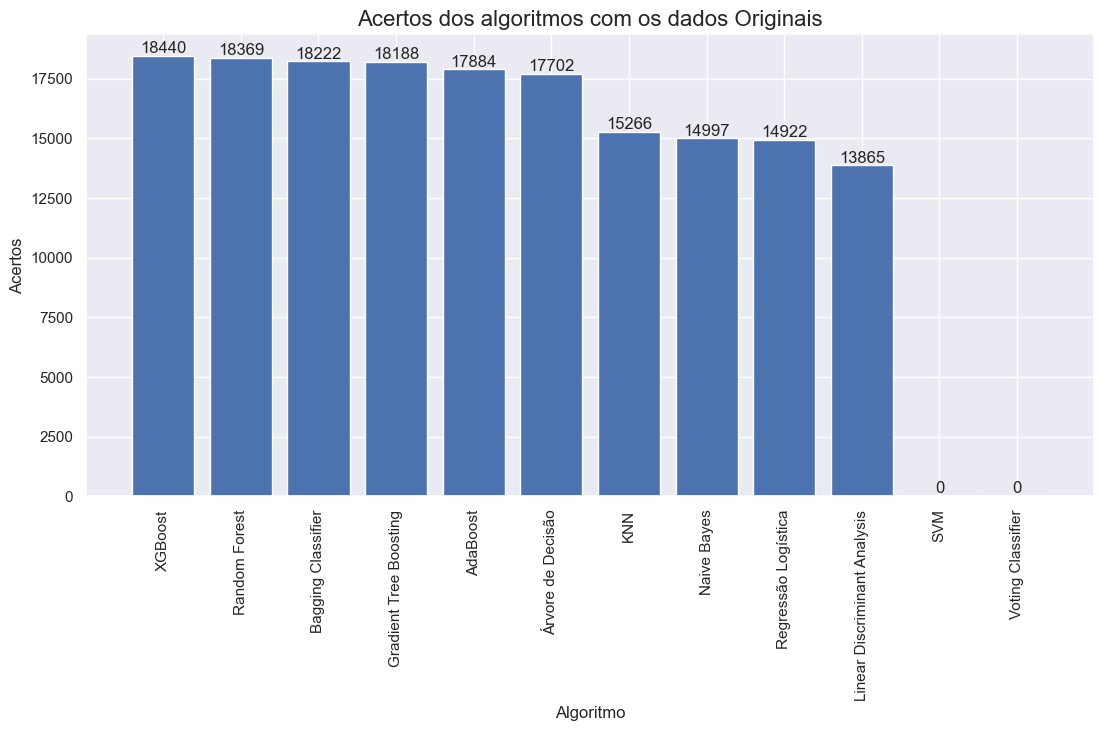

In [131]:
# Gráfico com os acertos dos algoritmos
fig, ax = plt.subplots(figsize=(13, 6))
ax.bar(dfComparaAlgoritmo.Algoritmo, dfComparaAlgoritmo["Acertos"])
ax.set_title("Acertos dos algoritmos com os dados " + apresentacaoDosDados, fontsize = 16)
ax.set_xlabel("Algoritmo", fontsize = 12)
ax.set_ylabel("Acertos", fontsize = 12)
ax.set_xticks(dfComparaAlgoritmo.Algoritmo) 
plt.xticks(rotation=90)
ax.bar_label(ax.containers[0])
# Salvando a figura no disco
plt.savefig("Dados\TalkingData\Acertos dos algoritmos com os dados " + apresentacaoDosDados + ".jpg", bbox_inches='tight')
plt.show()

## 13 - Salvando e carregando o modelo

### 13.1 - Salvando o modelo

In [132]:
# Salvando o modelo
arquivo = 'Dados/TalkingData/modeloClassificadorFinal.sav'
pickle.dump(modeloFinal, open(arquivo, 'wb'))
print("Modelo salvo!")

Modelo salvo!


### 13.2 - Carregando o modelo

In [133]:
# Carregando o modelo
modeloClassificador = pickle.load(open(arquivo, 'rb'))
print("Modelo carregado!")
modeloClassificador

Modelo carregado!


XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=0.8,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=15,
              predictor=None, random_state=None, ...)

### 13.3 - Salvando o objeto de normalização/padronização dos dados

In [134]:
# Os dados podem estar com apresentação "Originais", "Normalizados" ou "Padronizados"
if apresentacaoDosDados == "Normalizados":
    arquivoNormalizador = 'Dados/TalkingData/normalizador.sav'
    pickle.dump(min_max_scaler, open(arquivoNormalizador, 'wb'))
    print("Normalizador salvo!")
elif apresentacaoDosDados == "Padronizados":
    arquivoPadronizador = 'Dados/TalkingData/padronizador.sav'
    pickle.dump(scaler, open(arquivoPadronizador, 'wb'))
    print("Padronizador salvo!")

## 14 - Validando o modelo

In [135]:
# Visualizando o dataframe
dfValidacao

,ip,app,dispositivo,so,canal,horario_clique,horario_atribuido,atribuido
60743,120440,3,1,13,19,2017-11-07 00:31:49,,0
33949,294584,7,1,19,101,2017-11-09 07:17:57,2017-11-09 09:33:17,1


In [136]:
# Visualizando as variáveis selecionadas
variaveisSelecionadas

['ip', 'app', 'dispositivo', 'so', 'canal', 'hora_clique']

### 14.1 - Adiciona uma coluna com a hora do clique

In [137]:
# Converte uma coluna do tipo Object para o tipo datetime
dfValidacao["horario_clique"] = pd.to_datetime(dfValidacao.horario_clique)

In [138]:
# Cria uma coluna
dfValidacao["hora_clique"] = dfValidacao["horario_clique"].dt.hour
dfValidacao.head()

,ip,app,dispositivo,so,canal,horario_clique,horario_atribuido,atribuido,hora_clique
60743,120440,3,1,13,19,2017-11-07 00:31:49,,0,0
33949,294584,7,1,19,101,2017-11-09 07:17:57,2017-11-09 09:33:17,1,7


### 14.2 - Organizando o DataFrame

In [139]:
# Organizando o dataframe
valoresVariavelAlvo = dfValidacao[variavelAlvo]
dfValidacao.drop([variavelAlvo],  axis=1, inplace = True)

# Atualizando a variável alvo
dfValidacao[variavelAlvo] = valoresVariavelAlvo
dfValidacao

,ip,app,dispositivo,so,canal,horario_clique,horario_atribuido,hora_clique,atribuido
60743,120440,3,1,13,19,2017-11-07 00:31:49,,0,0
33949,294584,7,1,19,101,2017-11-09 07:17:57,2017-11-09 09:33:17,7,1


In [140]:
# Excluindo colunas desnecessárias
dfValidacao.drop(["horario_clique", "horario_atribuido"],  axis=1, inplace = True)
dfValidacao

,ip,app,dispositivo,so,canal,hora_clique,atribuido
60743,120440,3,1,13,19,0,0
33949,294584,7,1,19,101,7,1


### 14.3 - Fazendo as previsões

In [141]:
# Faz as previsões dos novos dados

if apresentacaoDosDados == "Originais":
    novosDados = dfValidacao[variaveisSelecionadas].values
    # Fazendo previsões
    previsoes = modeloClassificador.predict(novosDados)

elif apresentacaoDosDados == "Normalizados":
    # Carregando o objeto de normalização dos dados
    normalizador = pickle.load(open(arquivoNormalizador, 'rb'))
    # Normalizando os novos dados
    novosDados = dfValidacao[variaveisSelecionadas].values
    novosDadosNormalizados = normalizador.transform(novosDados)
    # Fazendo previsões
    previsoes = modeloClassificador.predict(novosDadosNormalizados)

else:
    # Carregando o objeto de padronização dos dados
    padronizador = pickle.load(open(arquivoPadronizador, 'rb'))
    # Padronizando os novos dados
    novosDados = dfValidacao[variaveisSelecionadas].values
    novosDadosPadronizados = padronizador.transform(novosDados)
    # Fazendo previsões
    previsoes = modeloClassificador.predict(novosDadosPadronizados)

previsoes

array([0, 1])

## 15 - Participando da competição

In [142]:
# Coletando os dados 
dfTeste = pd.read_csv('Dados/TalkingData/test.csv')
dfTeste

,click_id,ip,app,device,os,channel,click_time
0,0,5744,9,1,3,107,2017-11-10 04:00:00
1,1,119901,9,1,3,466,2017-11-10 04:00:00
2,2,72287,21,1,19,128,2017-11-10 04:00:00
3,3,78477,15,1,13,111,2017-11-10 04:00:00
4,4,123080,12,1,13,328,2017-11-10 04:00:00
...,...,...,...,...,...,...,...
18790464,18790464,99442,9,1,13,127,2017-11-10 15:00:00
18790465,18790465,88046,23,1,37,153,2017-11-10 15:00:00
18790466,18790467,81398,18,1,17,265,2017-11-10 15:00:00
18790467,18790466,123236,27,1,13,122,2017-11-10 15:00:00


In [143]:
# Preparando o dataframe
colunas = ["click_id", "ip", "app", "dispositivo", "so", "canal", "horario_clique"]
dfTeste.columns = colunas
dfTeste.head()

,click_id,ip,app,dispositivo,so,canal,horario_clique
0,0,5744,9,1,3,107,2017-11-10 04:00:00
1,1,119901,9,1,3,466,2017-11-10 04:00:00
2,2,72287,21,1,19,128,2017-11-10 04:00:00
3,3,78477,15,1,13,111,2017-11-10 04:00:00
4,4,123080,12,1,13,328,2017-11-10 04:00:00


In [144]:
# Converte uma coluna do tipo Object para o tipo datetime
dfTeste["horario_clique"] = pd.to_datetime(dfTeste.horario_clique)

In [145]:
# Cria uma coluna
dfTeste["hora_clique"] = dfTeste.horario_clique.dt.hour
dfTeste.head()

,click_id,ip,app,dispositivo,so,canal,horario_clique,hora_clique
0,0,5744,9,1,3,107,2017-11-10 04:00:00,4
1,1,119901,9,1,3,466,2017-11-10 04:00:00,4
2,2,72287,21,1,19,128,2017-11-10 04:00:00,4
3,3,78477,15,1,13,111,2017-11-10 04:00:00,4
4,4,123080,12,1,13,328,2017-11-10 04:00:00,4


In [146]:
# Variáveis selecionadas
variaveisSelecionadas = ["ip", "app", "dispositivo", "so",  "canal", "hora_clique"]

In [147]:
# Carregando o modelo
arquivo = 'Dados/TalkingData/modeloClassificadorFinal.sav'
modeloClassificador = pickle.load(open(arquivo, 'rb'))
print("Modelo carregado!")
modeloClassificador

Modelo carregado!


XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=0.8,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=15,
              predictor=None, random_state=None, ...)

In [148]:
# Armazenando os valores 
dados = dfTeste[variaveisSelecionadas].values

# Fazendo previsões
previsoes = modeloClassificador.predict(dados)
previsoes

array([0, 0, 0, ..., 0, 0, 0])

In [149]:
dfTeste["is_attributed"] = previsoes
dfTeste.head()

,click_id,ip,app,dispositivo,so,canal,horario_clique,hora_clique,is_attributed
0,0,5744,9,1,3,107,2017-11-10 04:00:00,4,0
1,1,119901,9,1,3,466,2017-11-10 04:00:00,4,0
2,2,72287,21,1,19,128,2017-11-10 04:00:00,4,0
3,3,78477,15,1,13,111,2017-11-10 04:00:00,4,0
4,4,123080,12,1,13,328,2017-11-10 04:00:00,4,0


In [150]:
# Excluindo uma coluna
dfTeste.drop(["hora_clique"], axis=1, inplace = True)
dfTeste.head()

,click_id,ip,app,dispositivo,so,canal,horario_clique,is_attributed
0,0,5744,9,1,3,107,2017-11-10 04:00:00,0
1,1,119901,9,1,3,466,2017-11-10 04:00:00,0
2,2,72287,21,1,19,128,2017-11-10 04:00:00,0
3,3,78477,15,1,13,111,2017-11-10 04:00:00,0
4,4,123080,12,1,13,328,2017-11-10 04:00:00,0


In [151]:
# Preparando o dataframe
colunas = ["click_id", "ip", "app", "device", "os", "channel", "click_time", "is_attributed"]
dfTeste.columns = colunas
dfTeste.head()

,click_id,ip,app,device,os,channel,click_time,is_attributed
0,0,5744,9,1,3,107,2017-11-10 04:00:00,0
1,1,119901,9,1,3,466,2017-11-10 04:00:00,0
2,2,72287,21,1,19,128,2017-11-10 04:00:00,0
3,3,78477,15,1,13,111,2017-11-10 04:00:00,0
4,4,123080,12,1,13,328,2017-11-10 04:00:00,0


In [152]:
# Gerando um arquivo CSV a partir de um Dataframe
try:
    dfTeste[["click_id", "is_attributed"]].to_csv('Dados/TalkingData/submit.csv', index = False)
    print("Arquivo salvo!")

except OSError as mensagemOSError: # Erro de entrada e saída
    print(mensagemOSError)

Arquivo salvo!
